## Libraries

In [1]:
import tempfile
import math
import os
from subprocess import call
import matplotlib.pyplot as plt
from f90nml import *
from array import *
import numpy as np
import pandas as pd 
import seaborn as sns
from statistics import *
import shutil
import sys
import time
from matplotlib.ticker import FormatStrFormatter

#read in printFolder, makeDefNameList, newFolder, deleteFolder, readOutput from coreFunctions.py
from coreFunctions import *

#read in plotting functionality from plottingFunctions.py
from plottingFunctions import *

call("rm -rf tmp*",shell=True)

dfModel = []#will contain output from our model

## Enter Custom Inputs, then Run the Model

The Habitable Zone if pCO2=28ppm is:
Minimum: 0.93 AU
Maximum: 1.0 AU
Max Pop: 3.2531 billion, at Distance: 0.98

Equilibrium Reached at Temp=337.141. At time=96.0
Final Temp(K): 439.21
Final Temp(F): 330.91



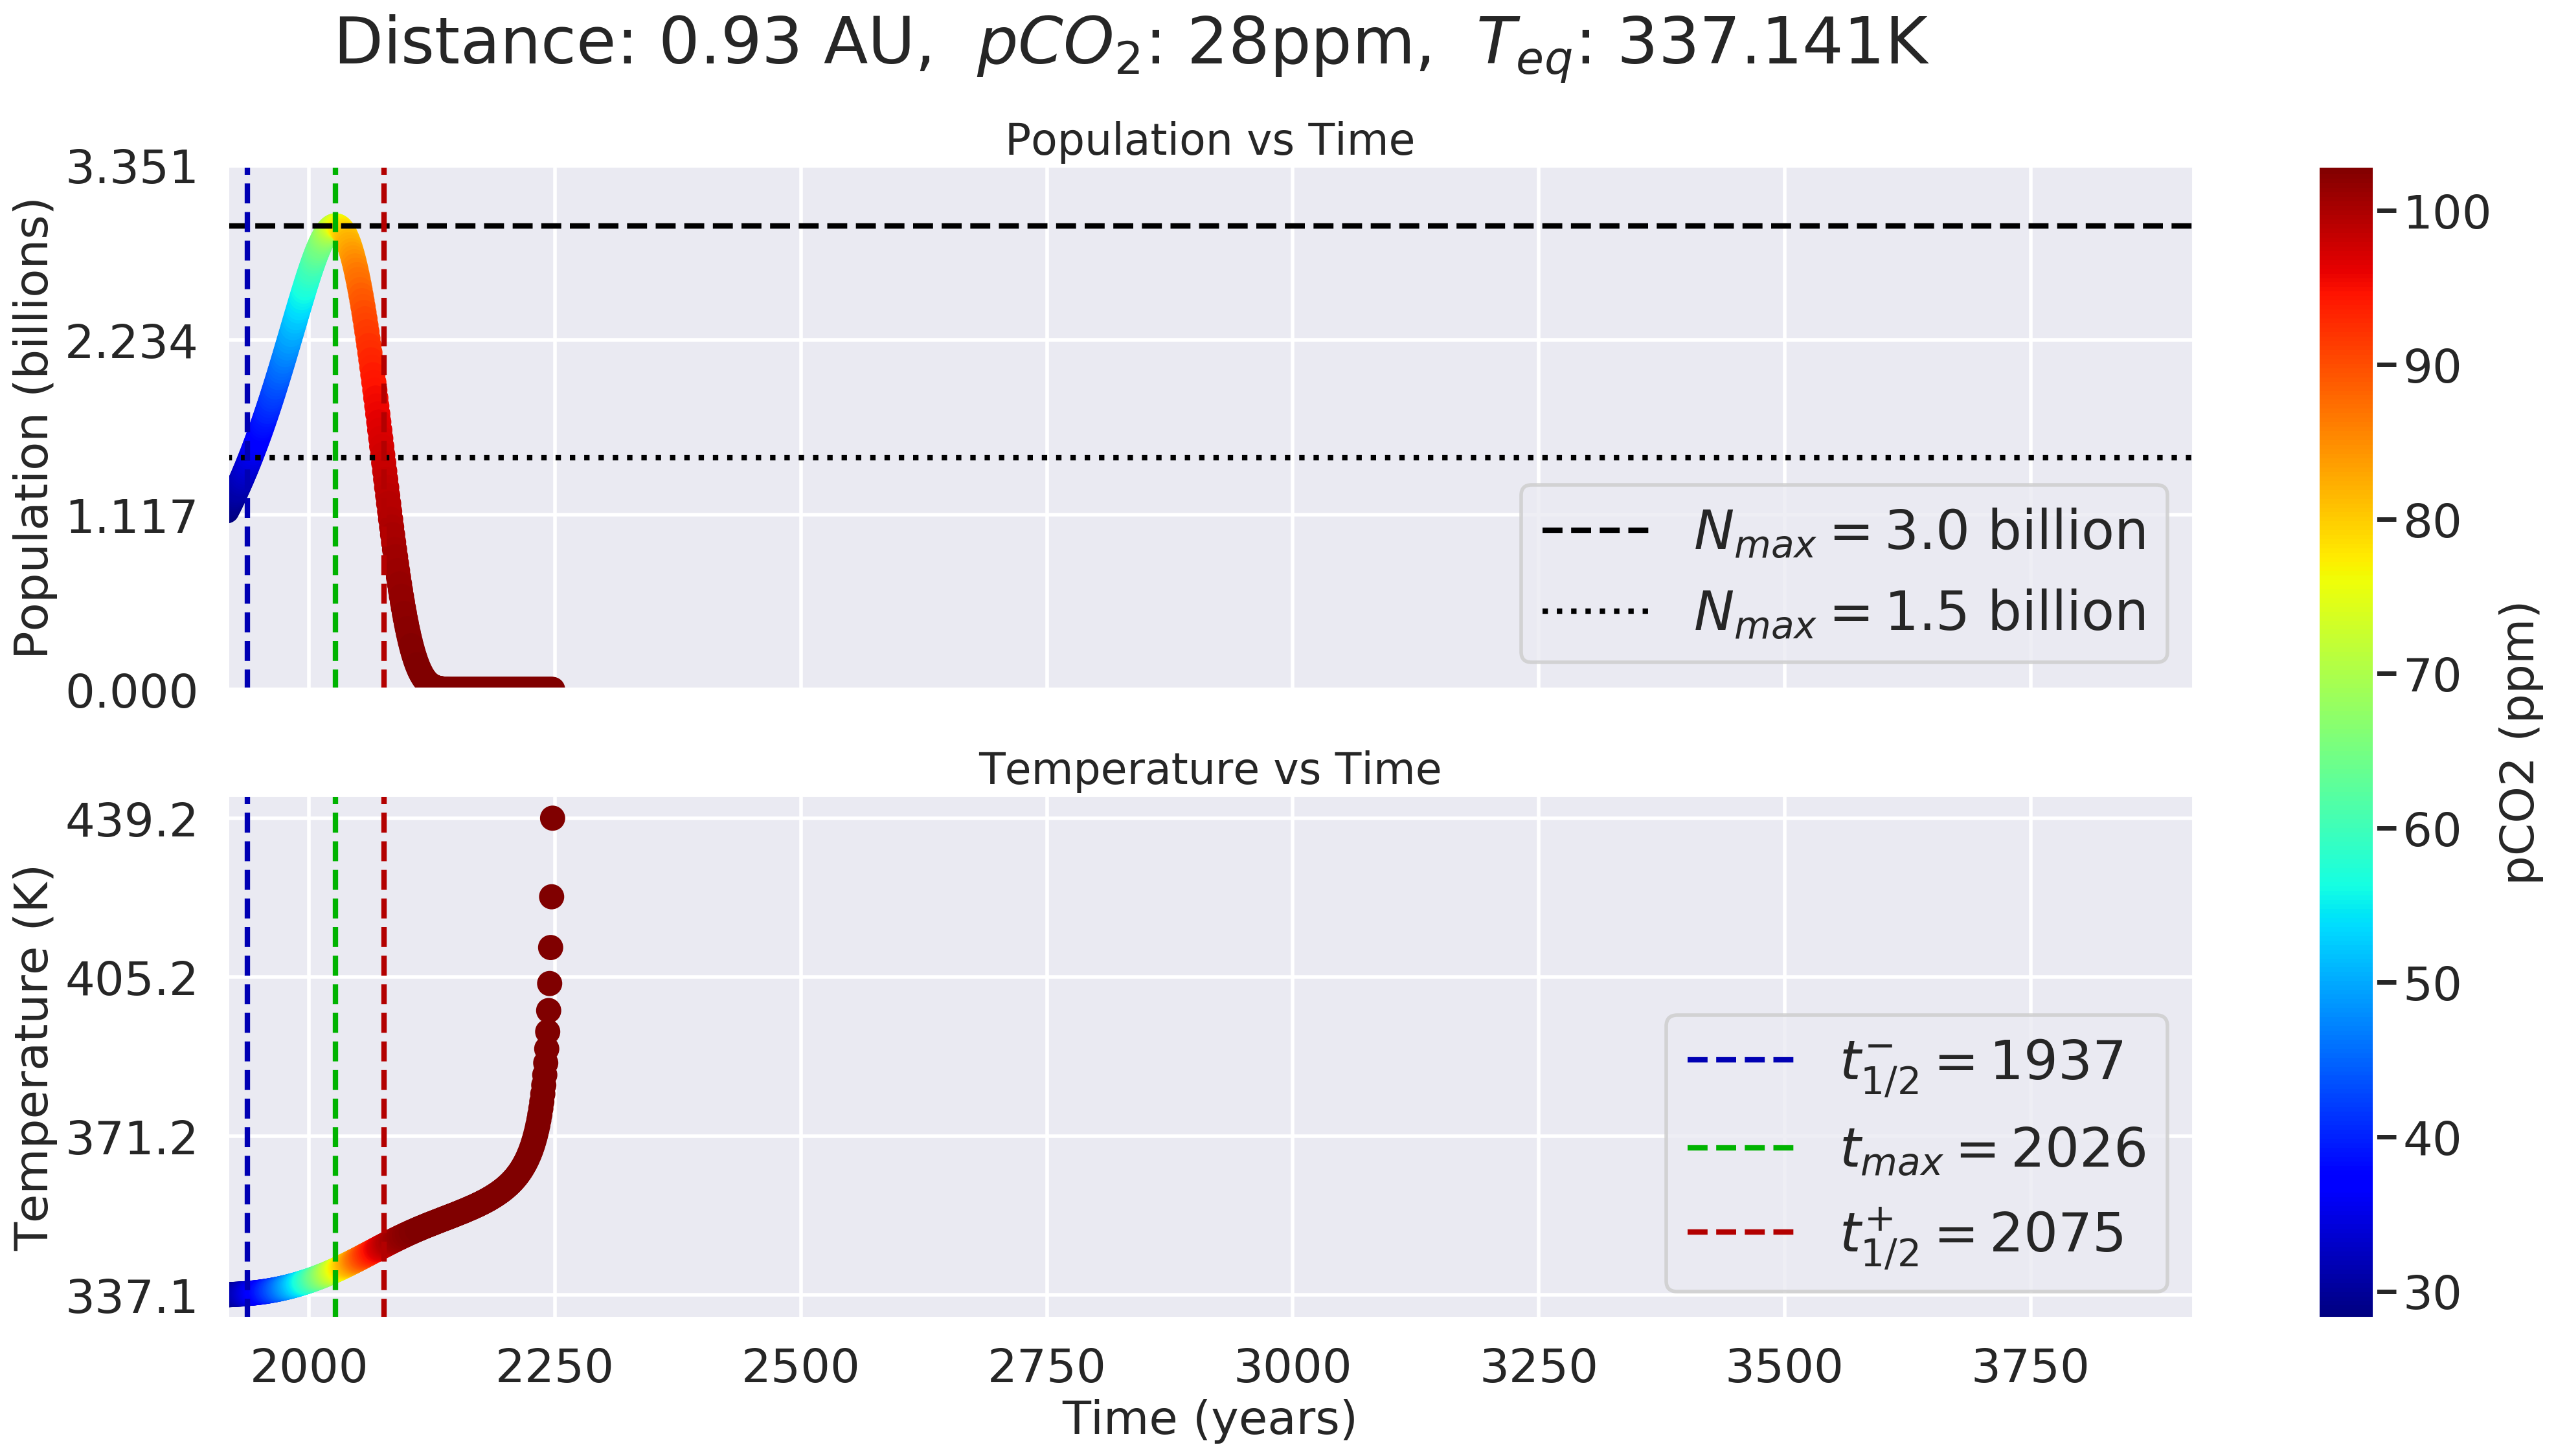

Equilibrium Reached at Temp=310.701. At time=42.0
Final Temp(K): 319.47
Final Temp(F): 115.38



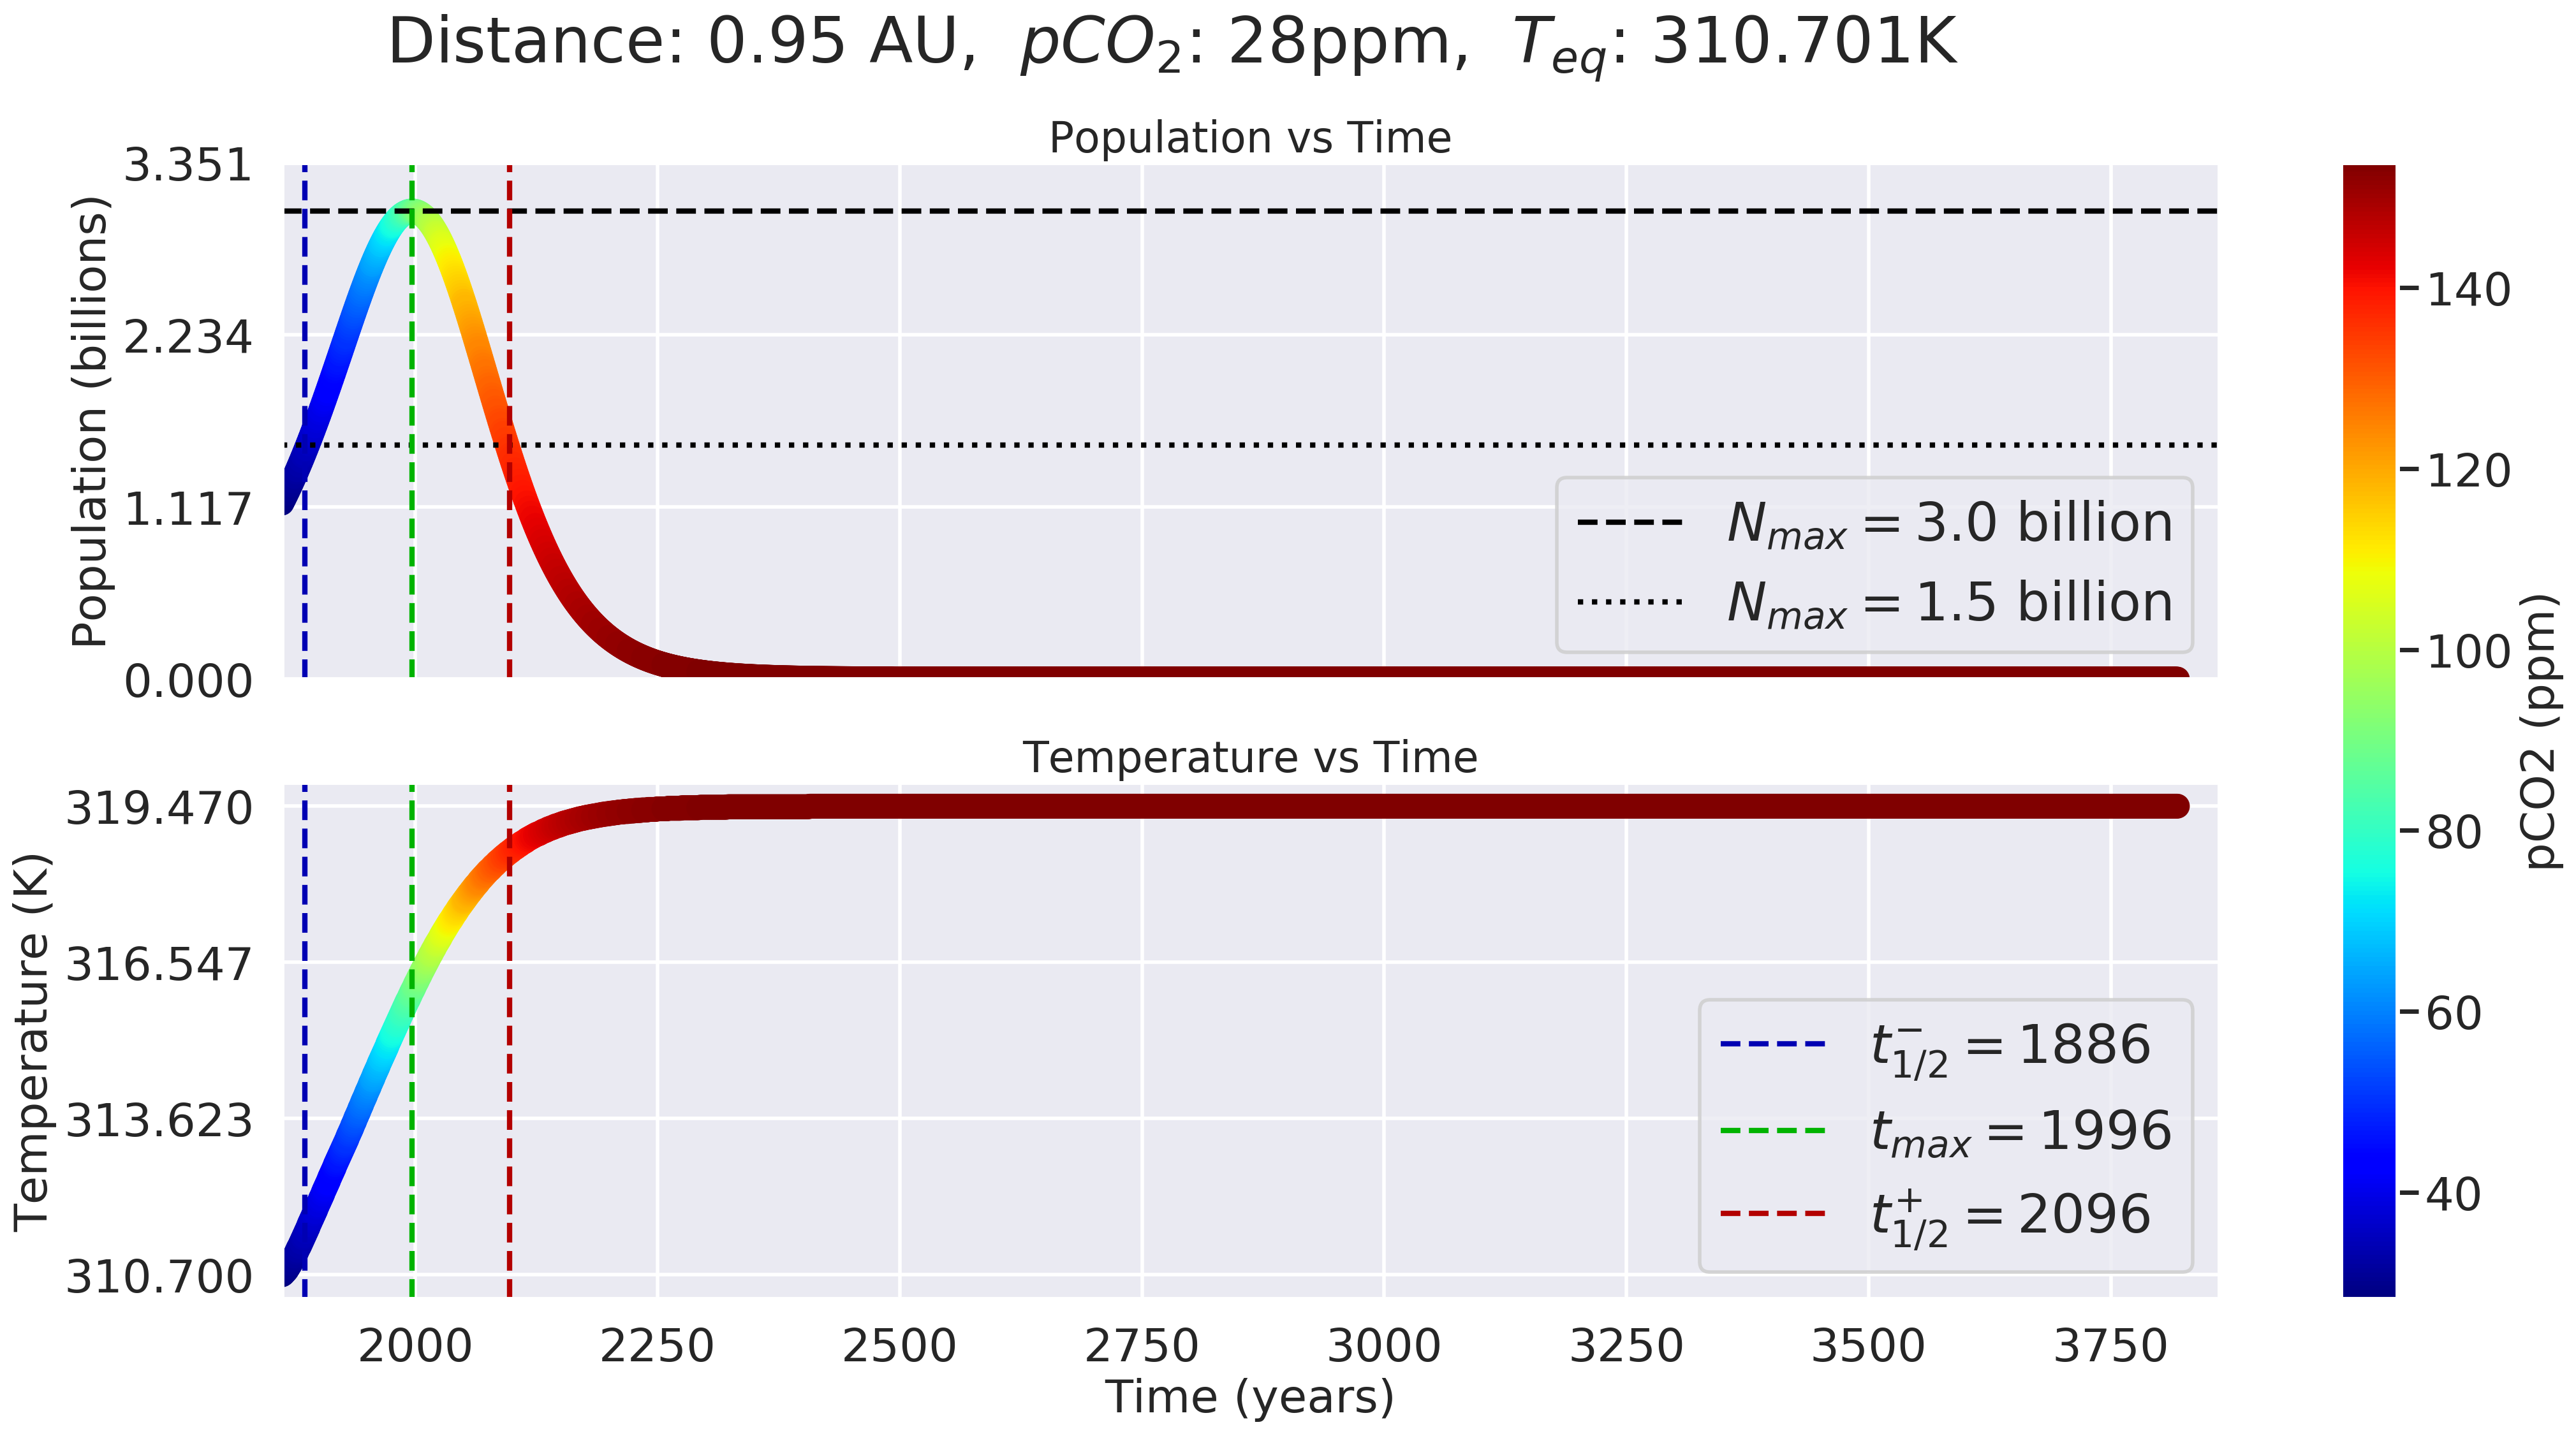

Equilibrium Reached at Temp=289.877. At time=25.0
Final Temp(K): 297.68
Final Temp(F): 76.15



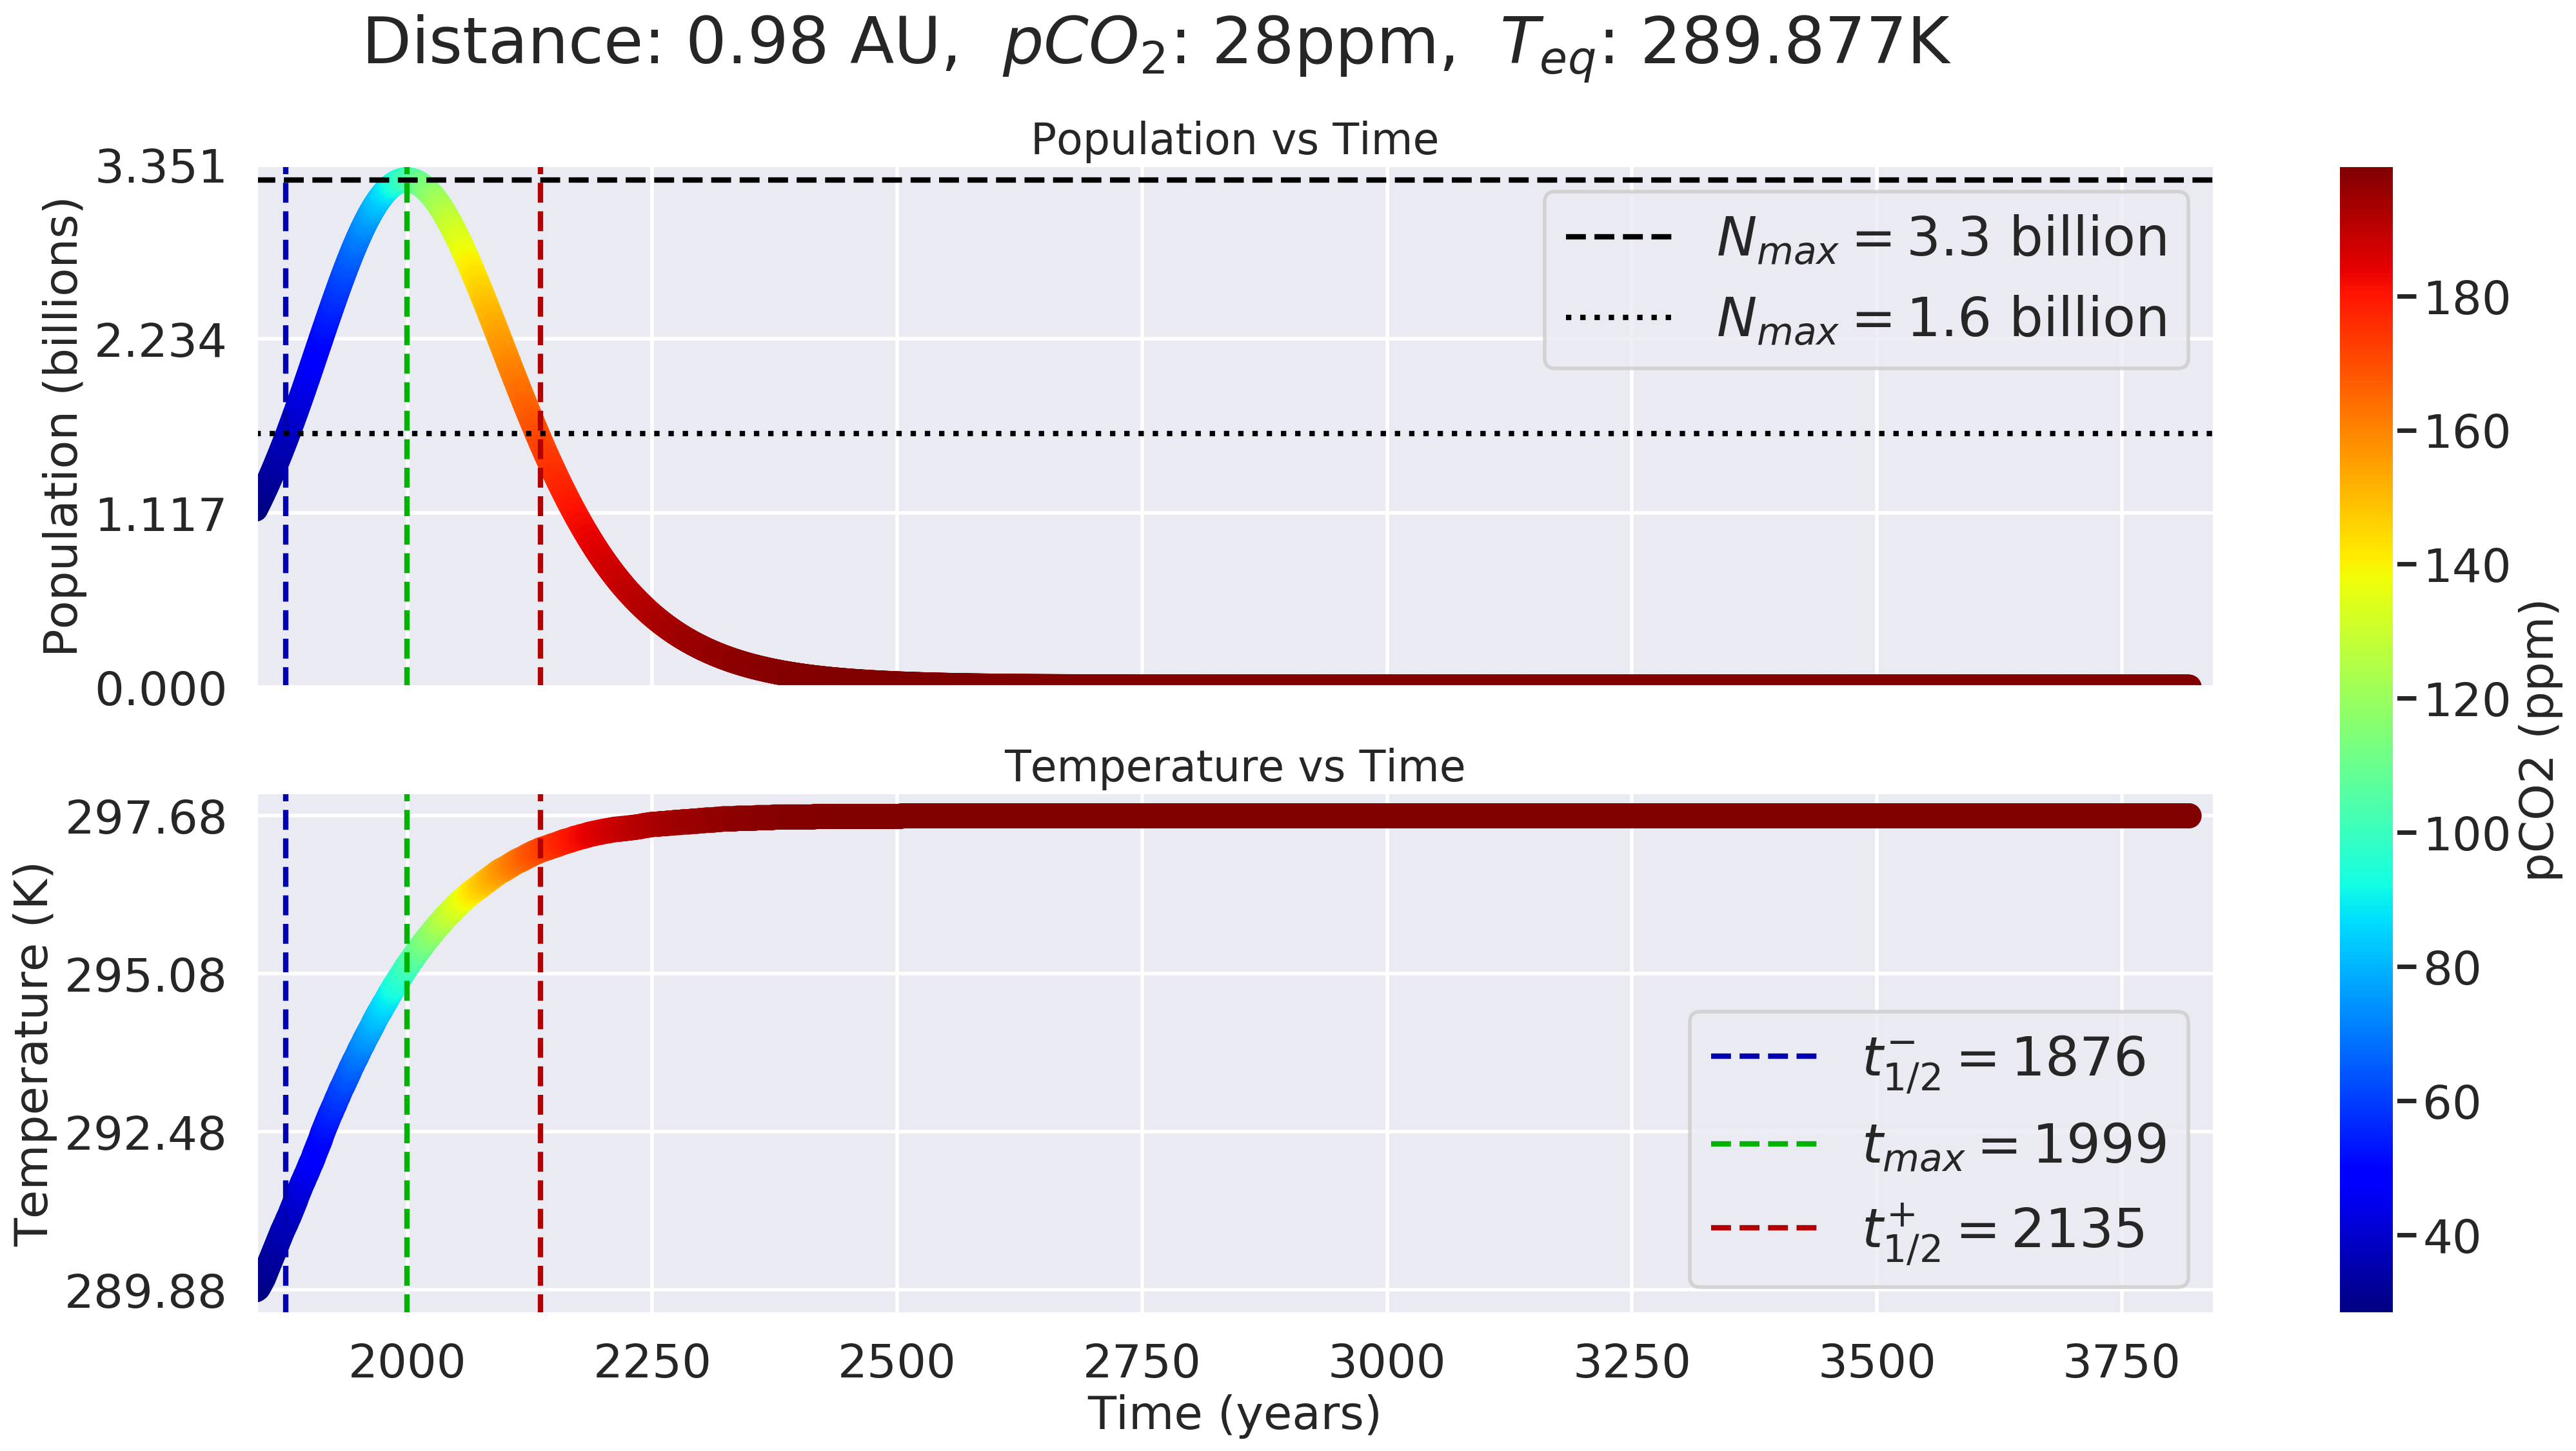

Equilibrium Reached at Temp=278.369. At time=24.0
Final Temp(K): 286.09
Final Temp(F): 55.29



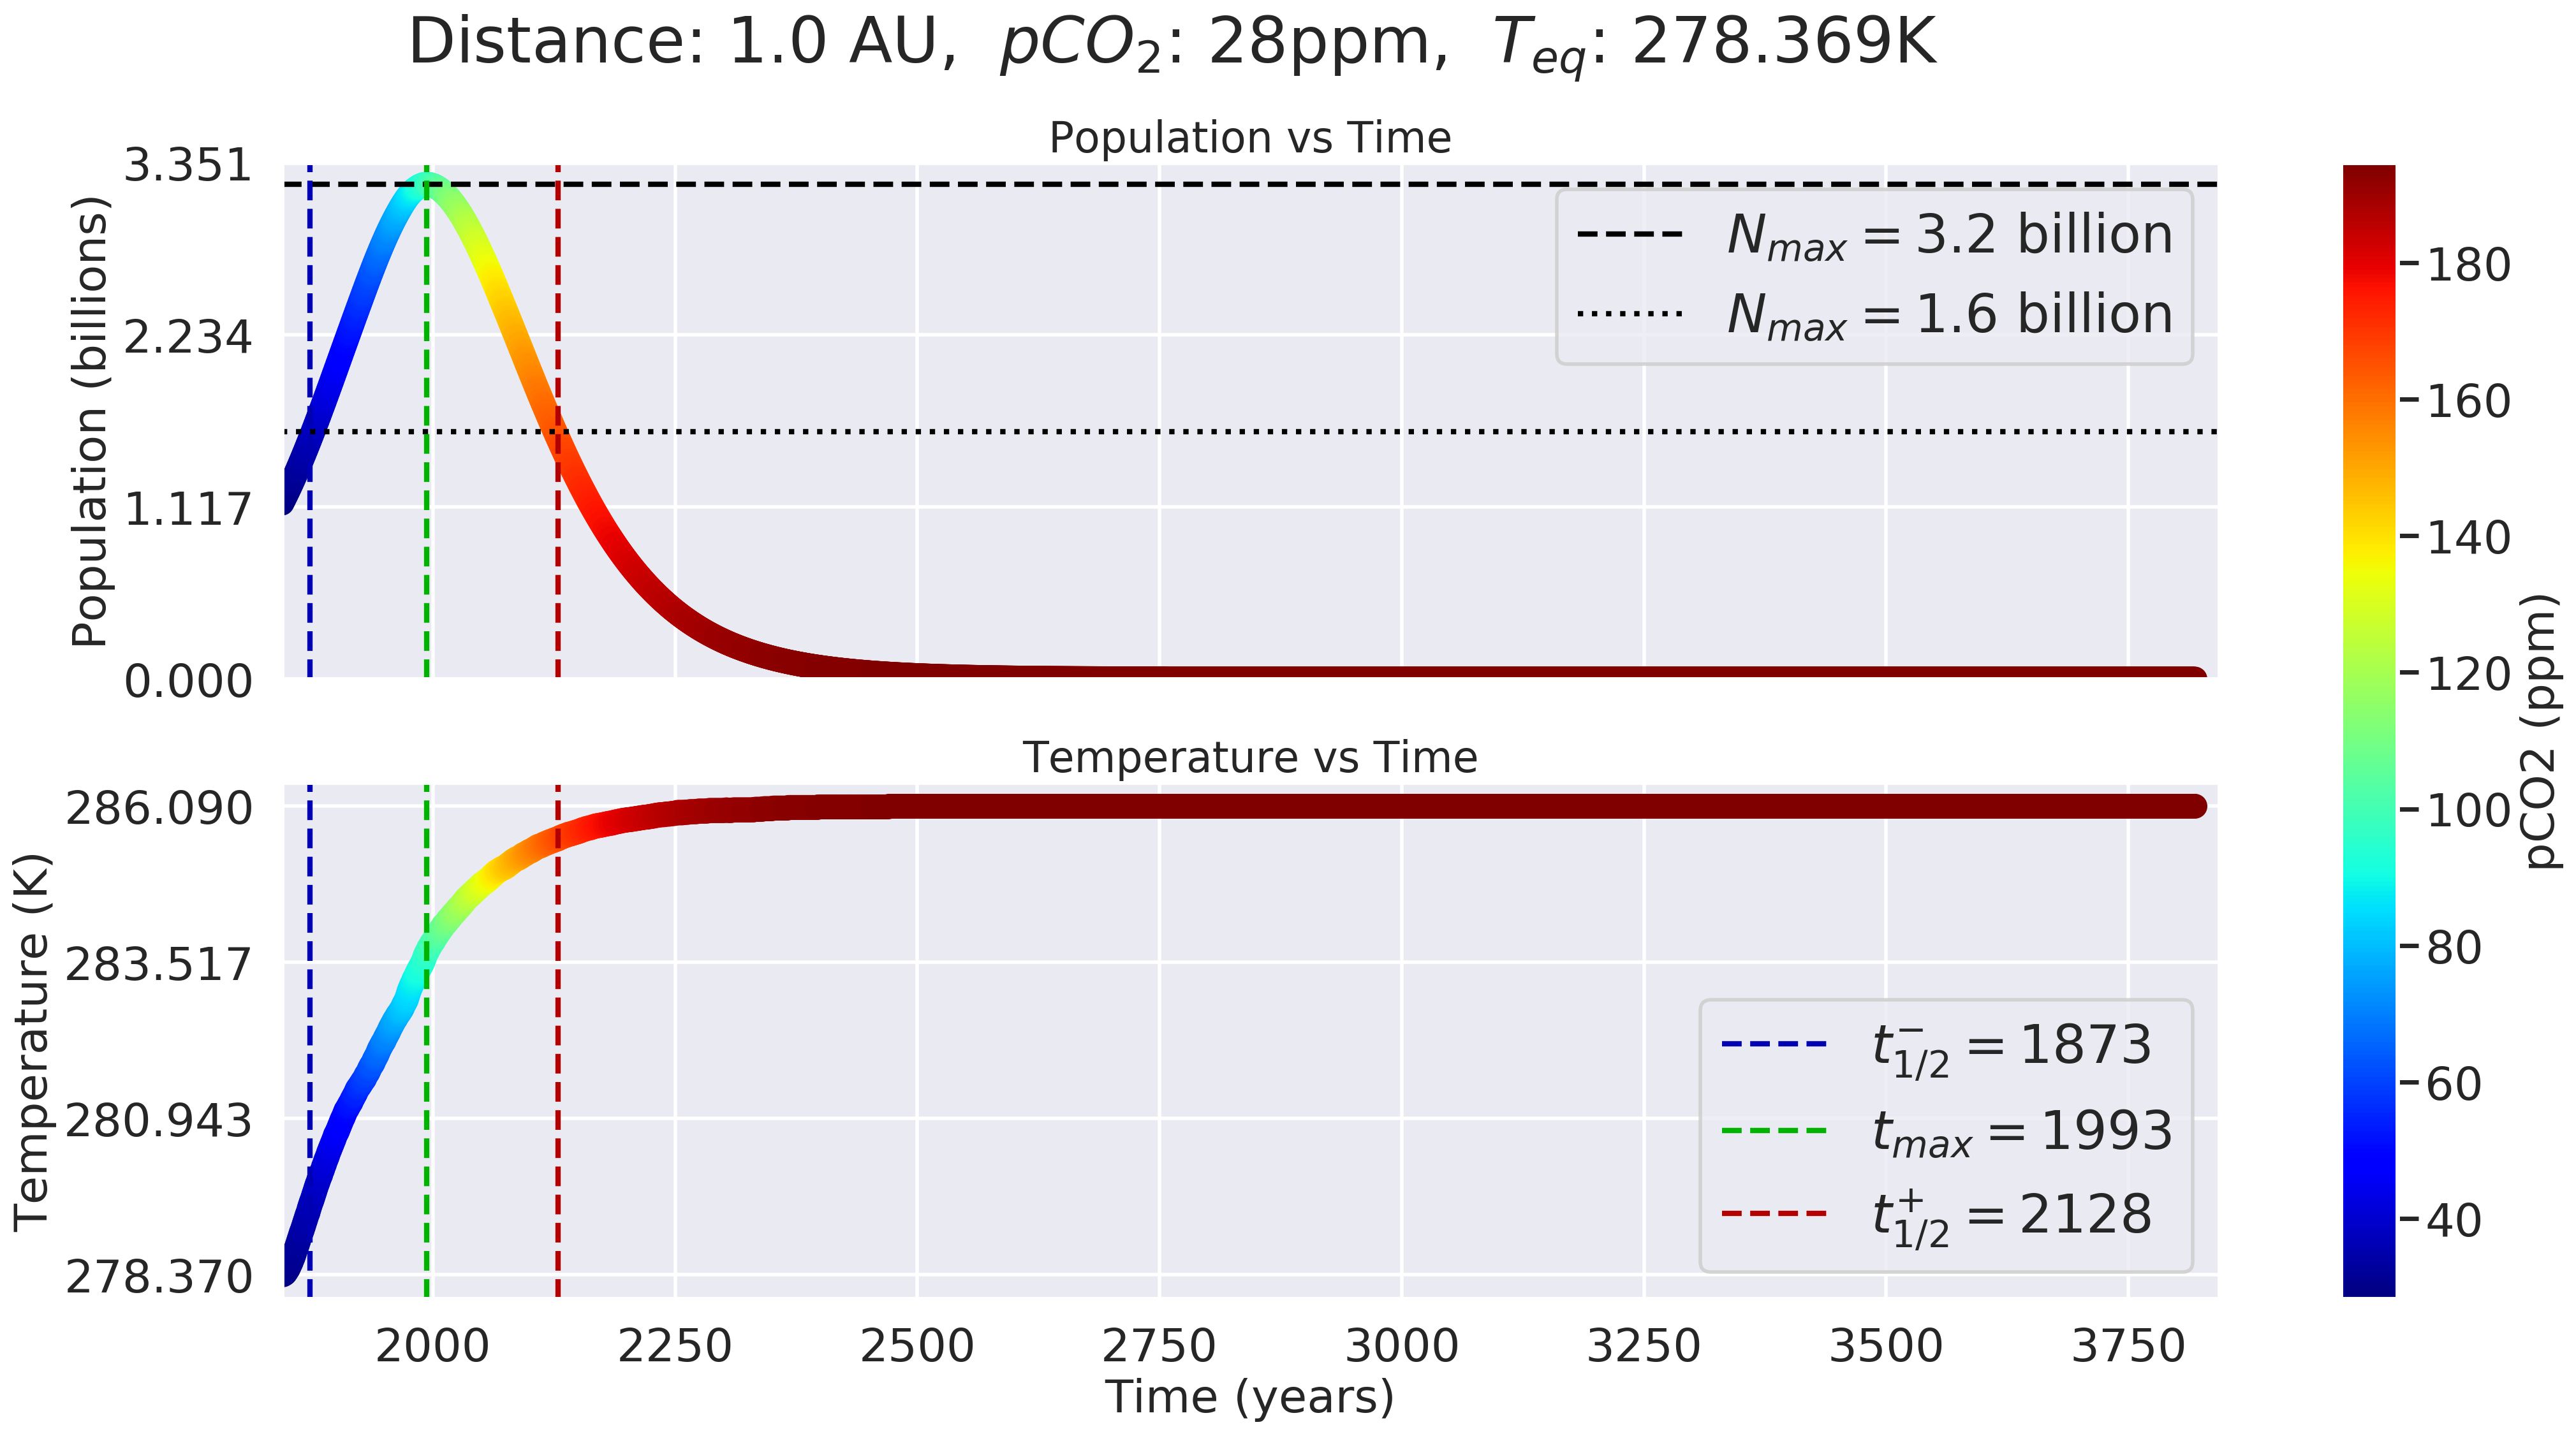

Elapsed Time: 344.3289940357208
The Habitable Zone if pCO2=280ppm is:
Minimum: 0.94 AU
Maximum: 1.02 AU
Max Pop: 37.112 billion, at Distance: 1.0

Equilibrium Reached at Temp=339.174. At time=93.0
Final Temp(K): 443.98
Final Temp(F): 339.49



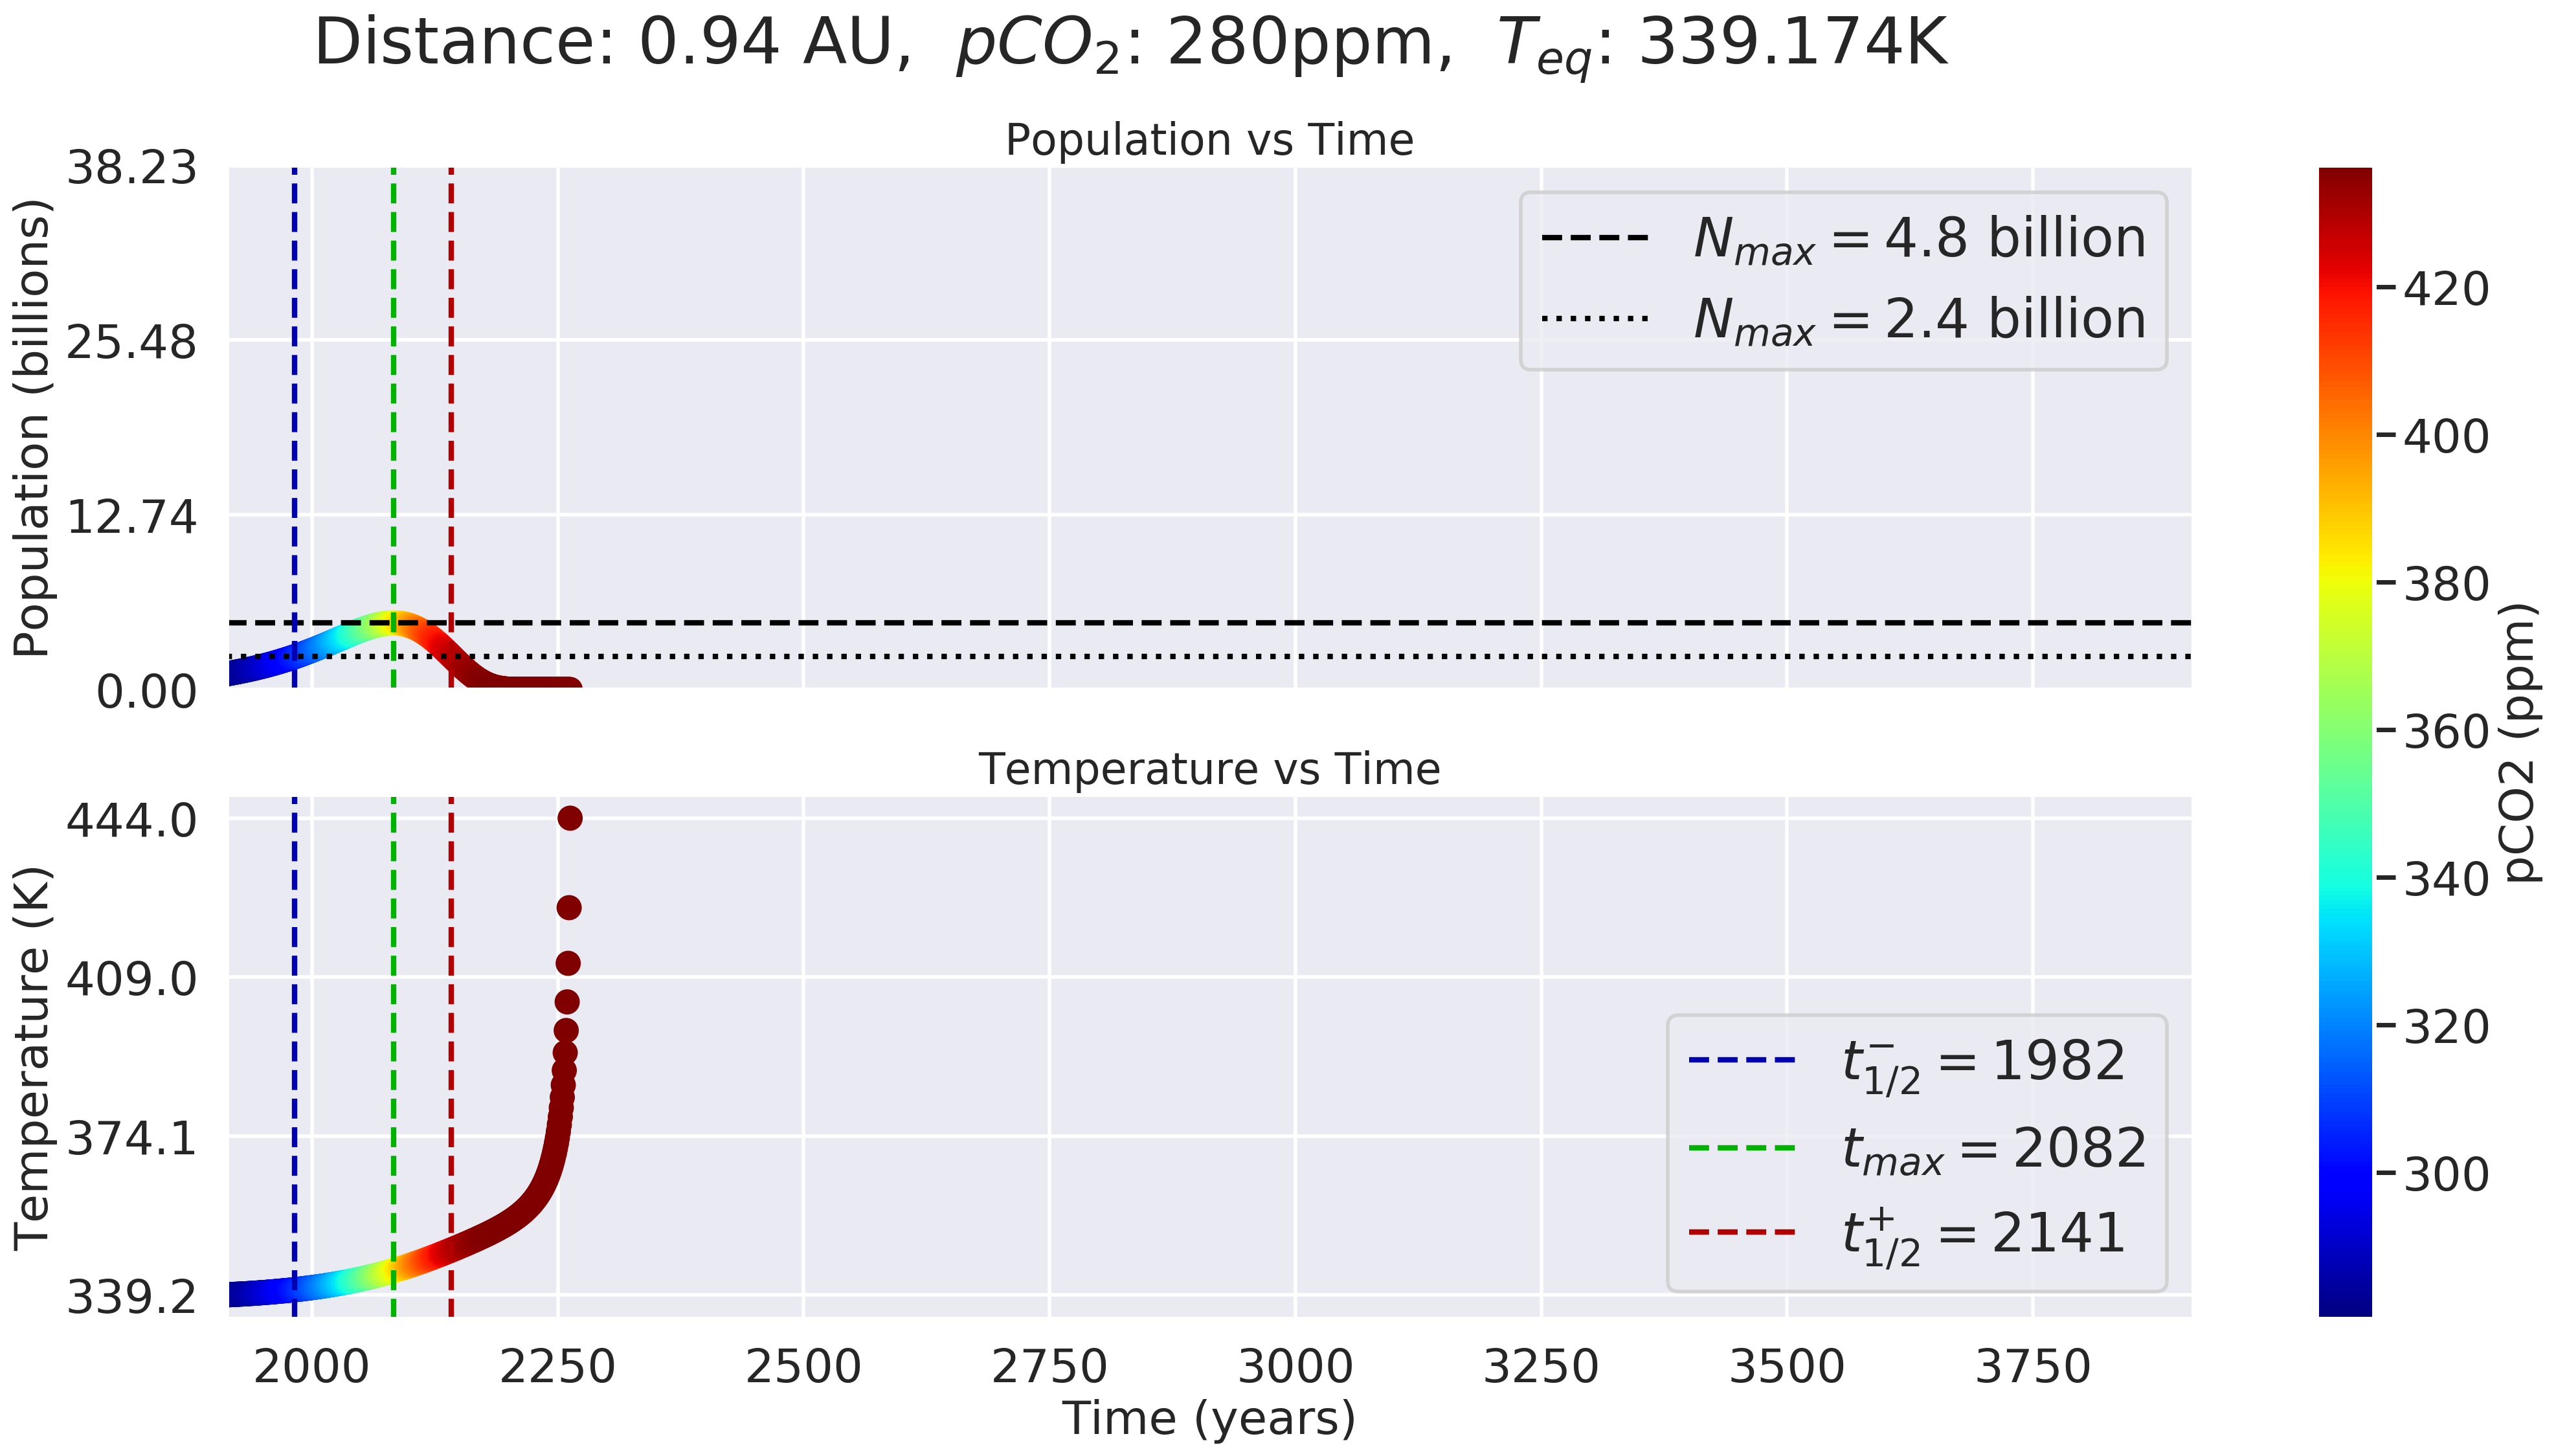

Equilibrium Reached at Temp=305.504. At time=38.0
Final Temp(K): 313.7
Final Temp(F): 104.99



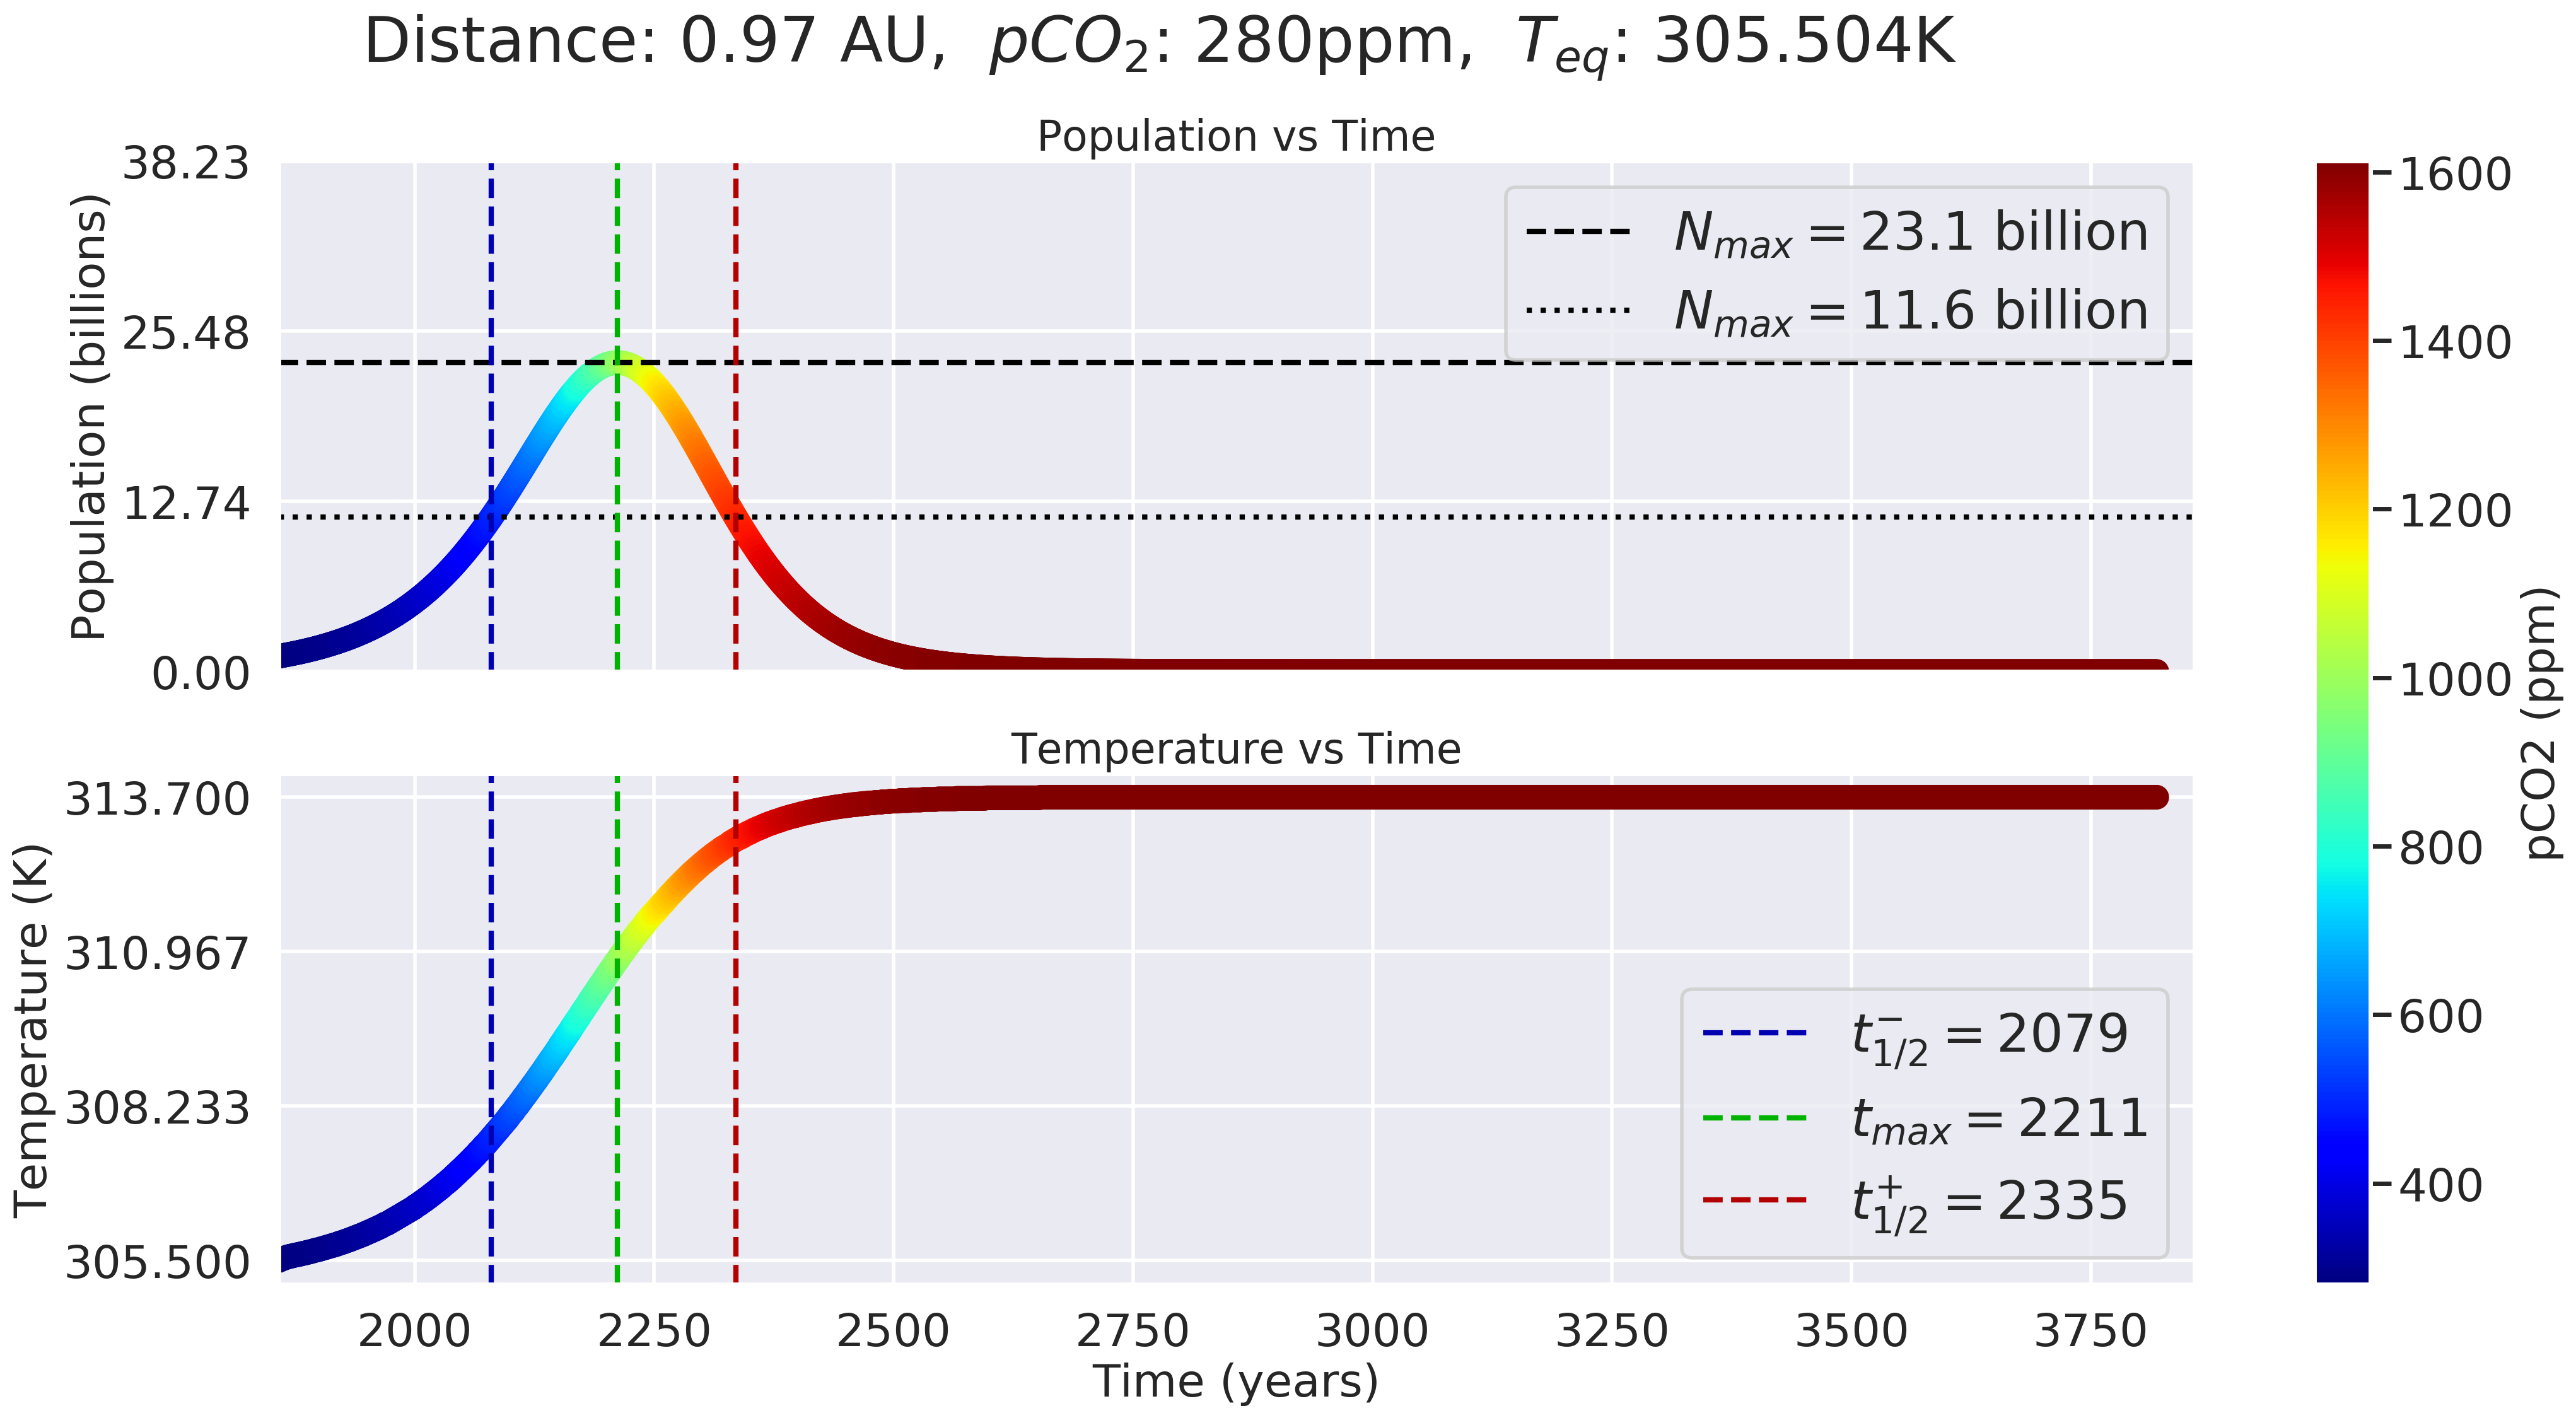

Equilibrium Reached at Temp=292.614. At time=28.0
Final Temp(K): 300.67
Final Temp(F): 81.54



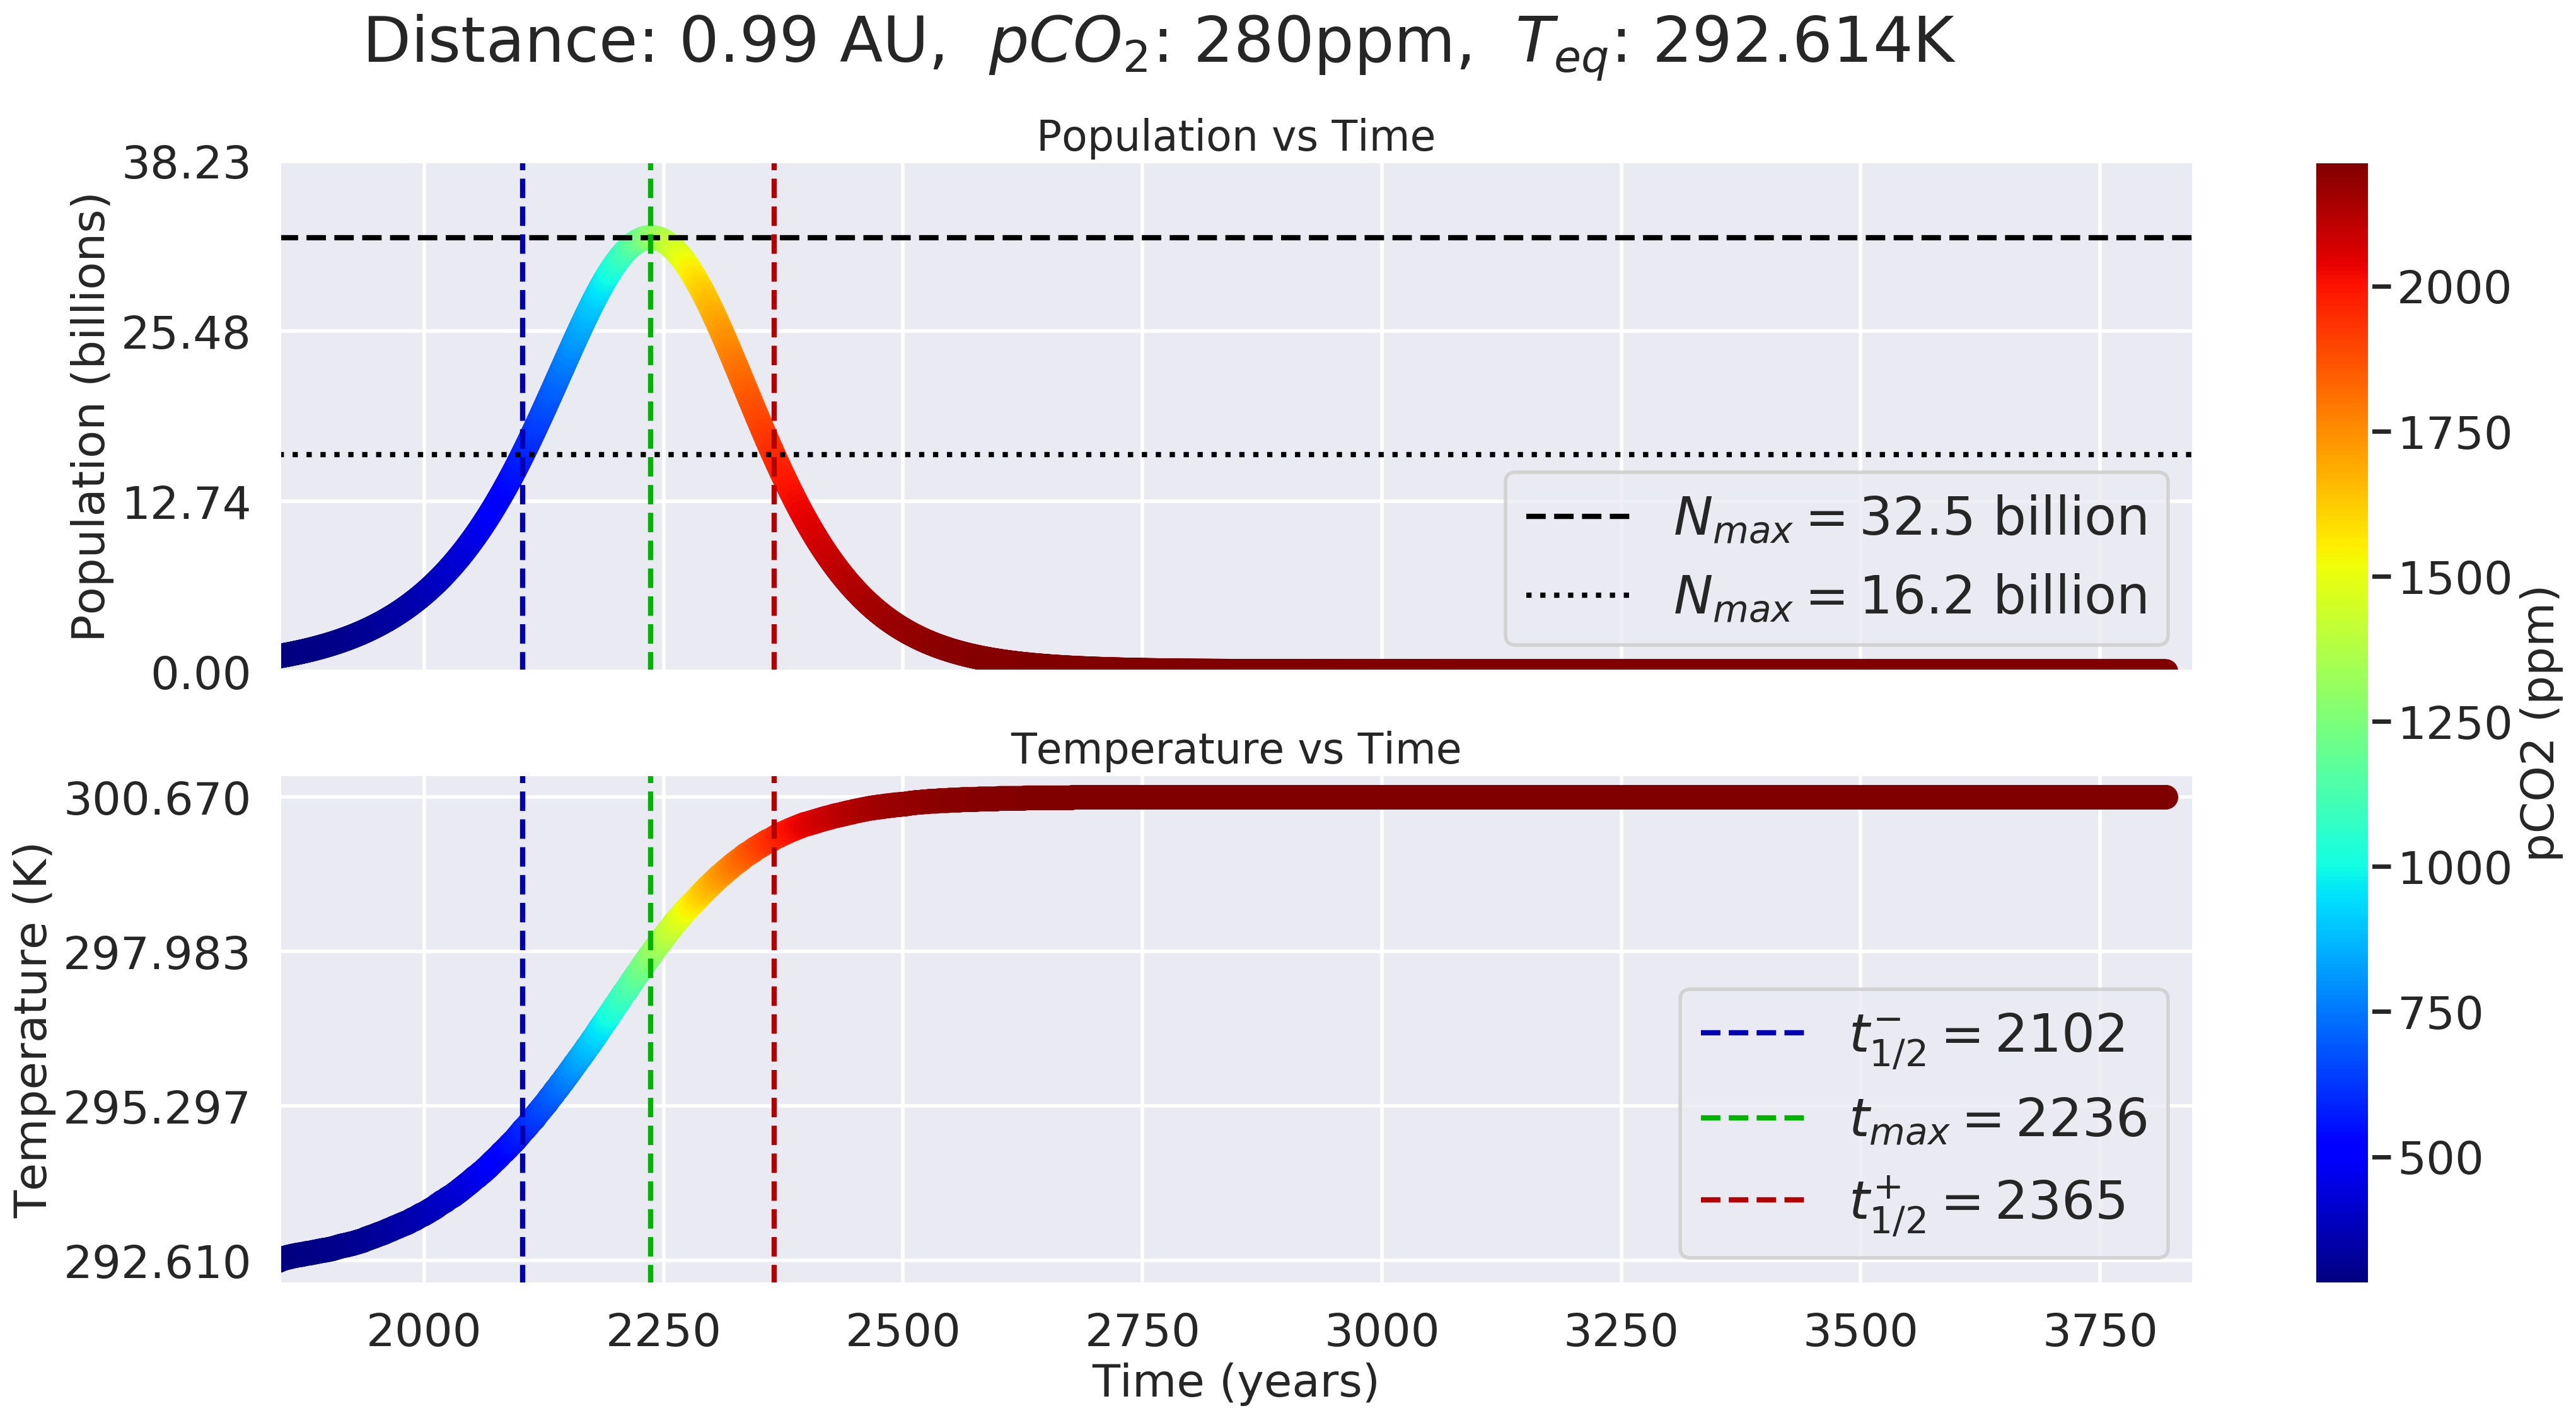

Equilibrium Reached at Temp=275.758. At time=28.0
Final Temp(K): 284.06
Final Temp(F): 51.64



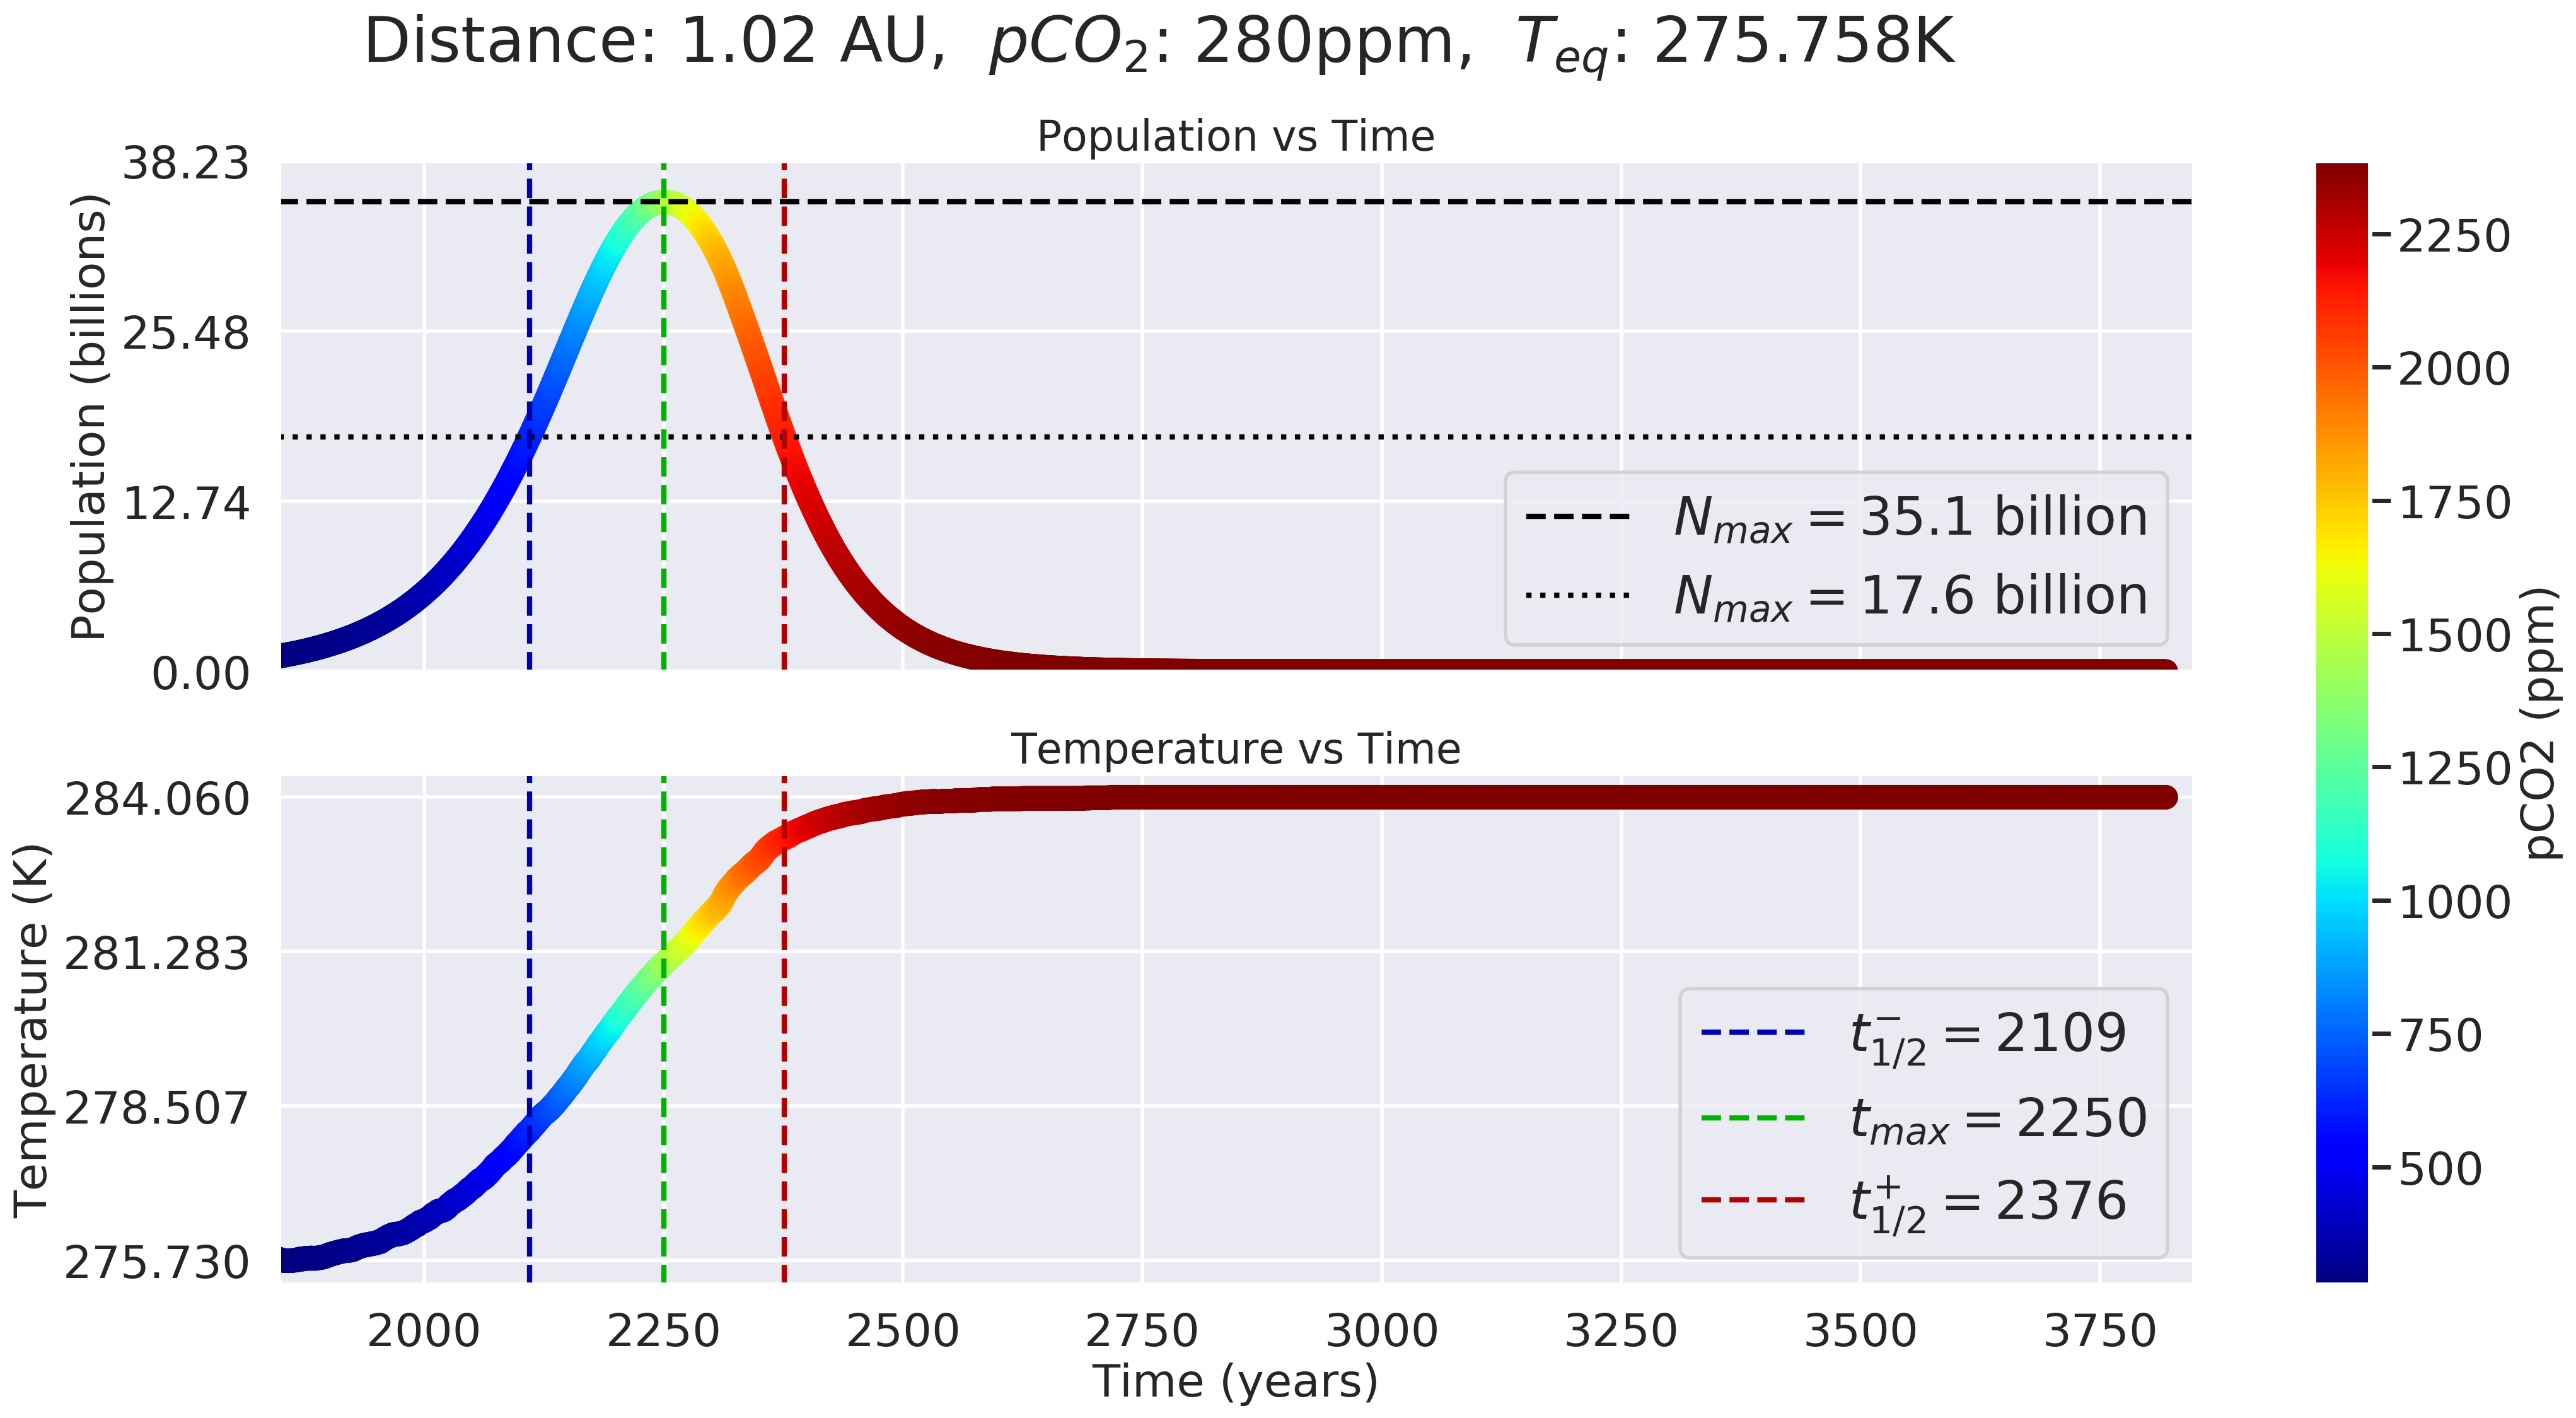

Elapsed Time: 581.4665570259094
The Habitable Zone if pCO2=2800ppm is:
Minimum: 0.95 AU
Maximum: 1.03 AU
Max Pop: 124.89 billion, at Distance: 1.0

Equilibrium Reached at Temp=350.048. At time=183.0
Final Temp(K): 449.34
Final Temp(F): 349.14



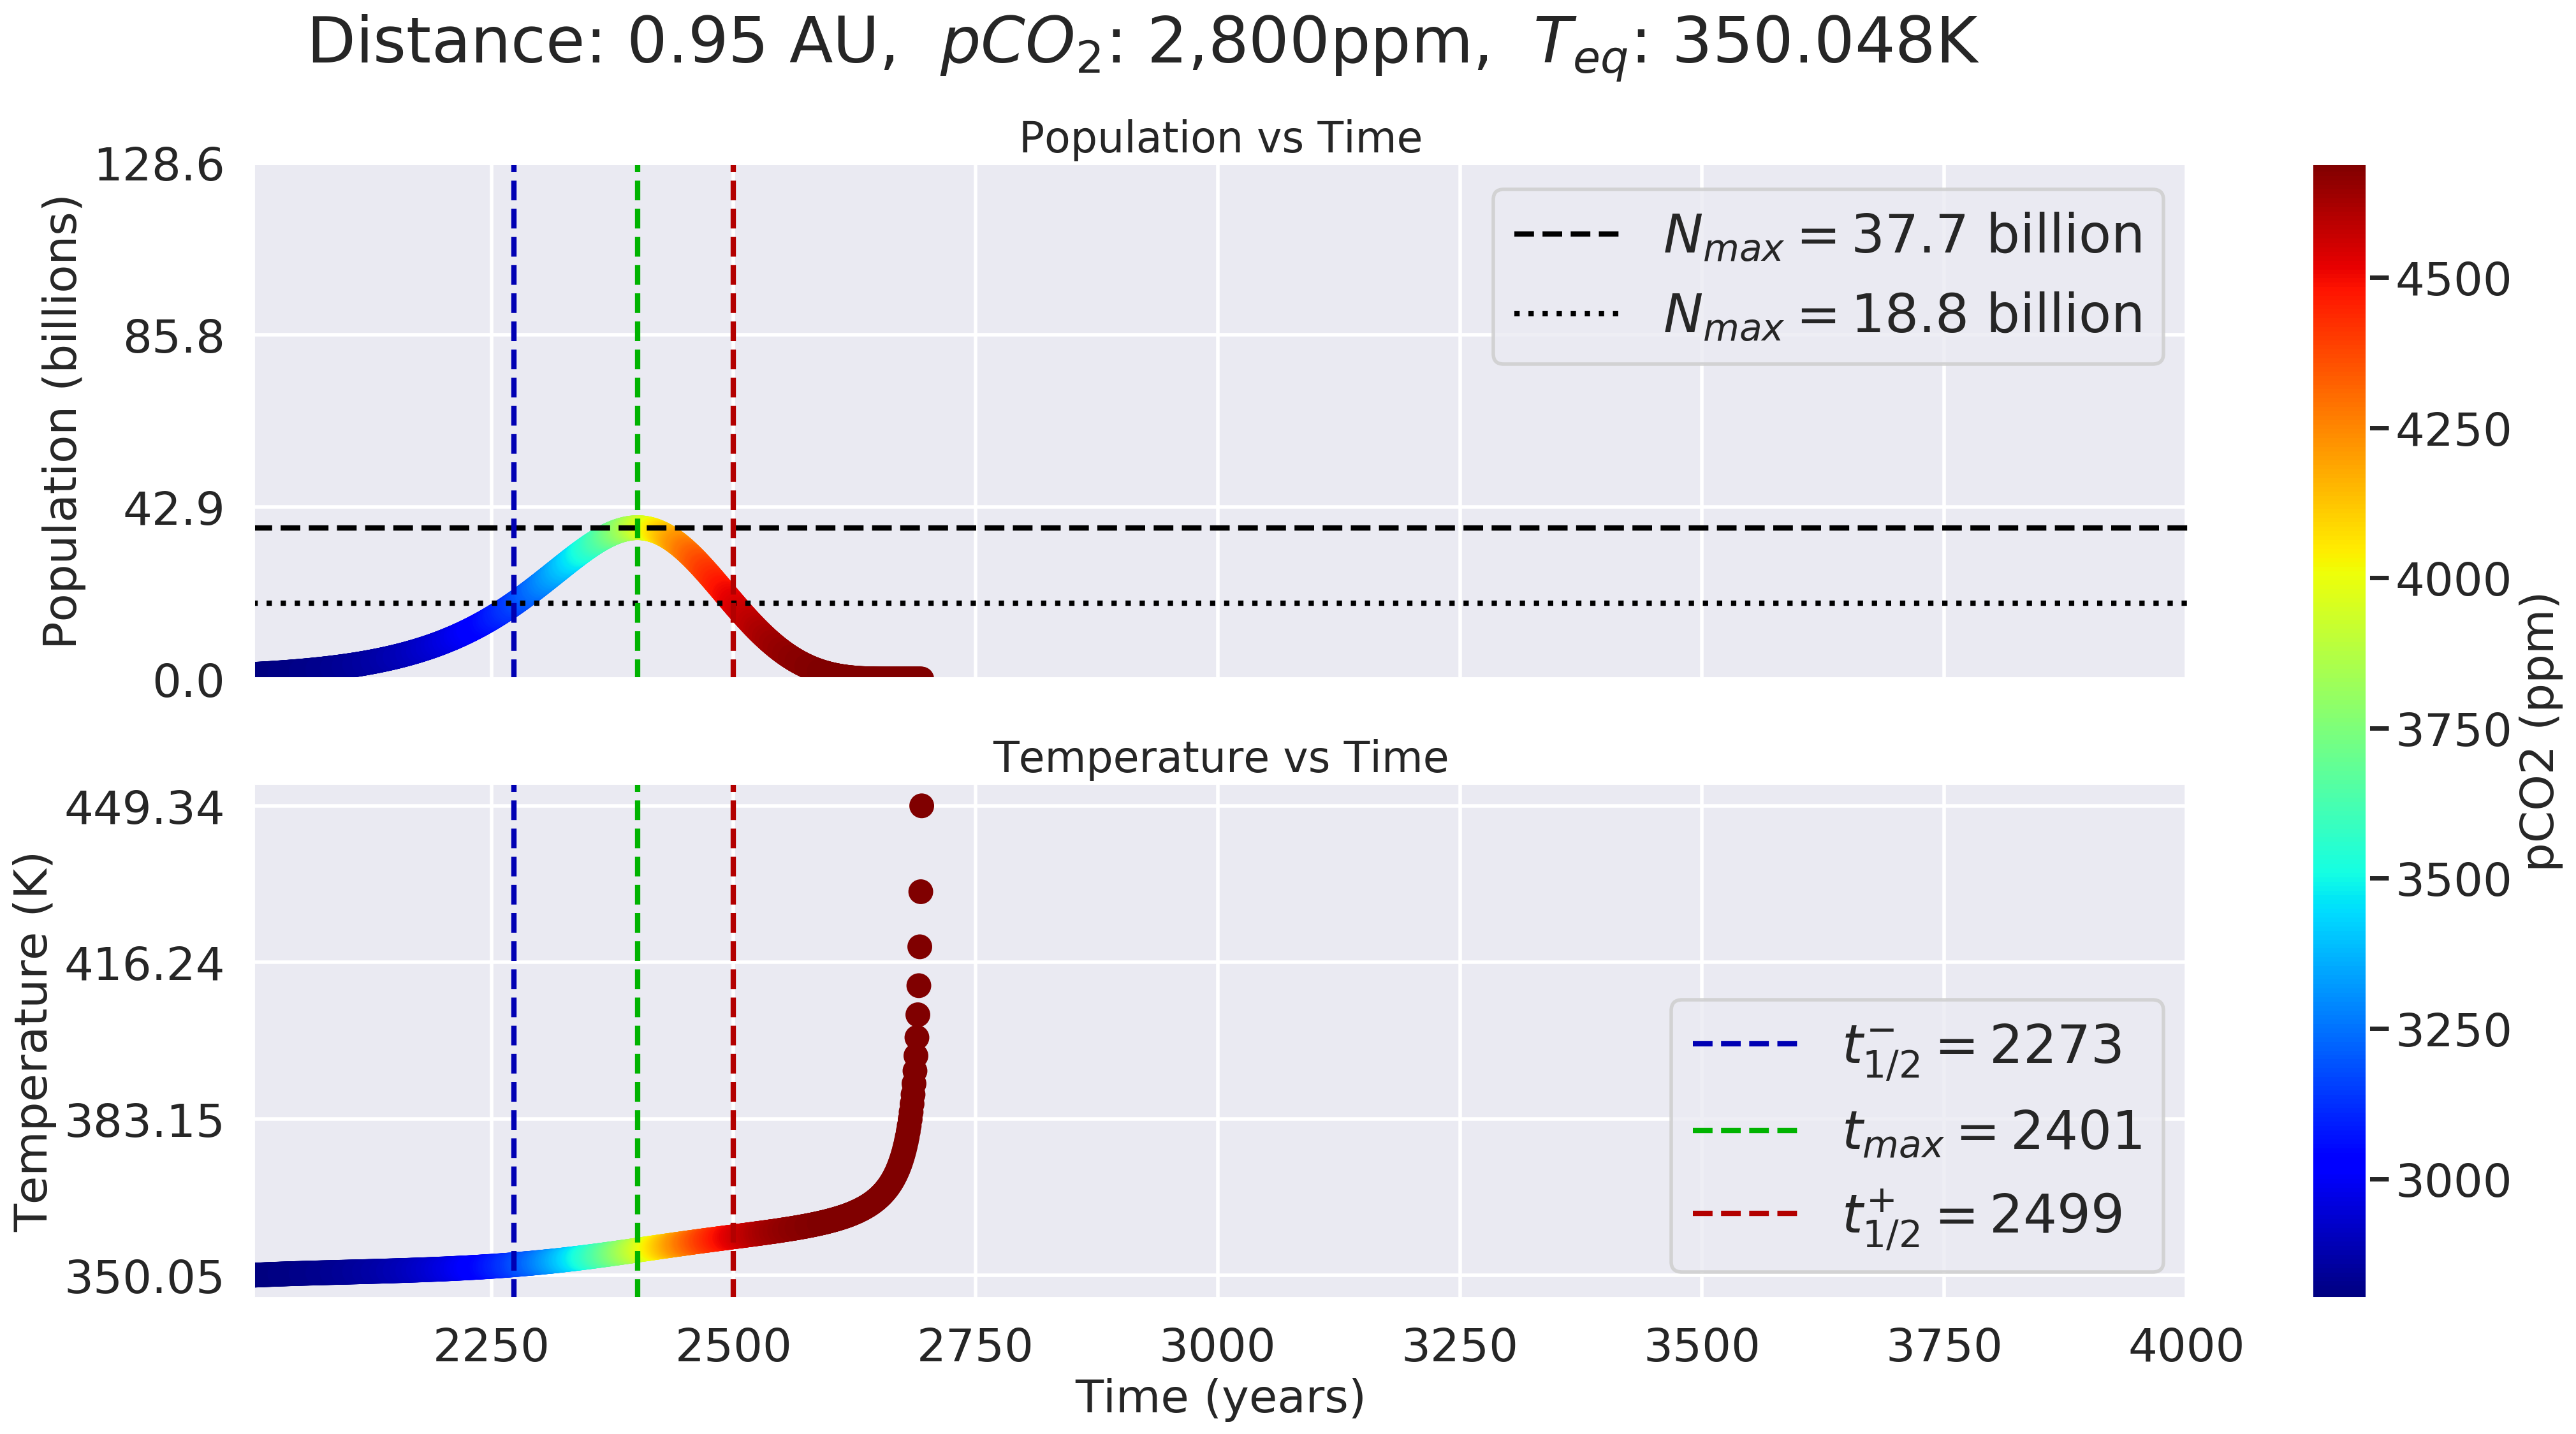

Equilibrium Reached at Temp=308.983. At time=40.0
Final Temp(K): 317.56
Final Temp(F): 111.94



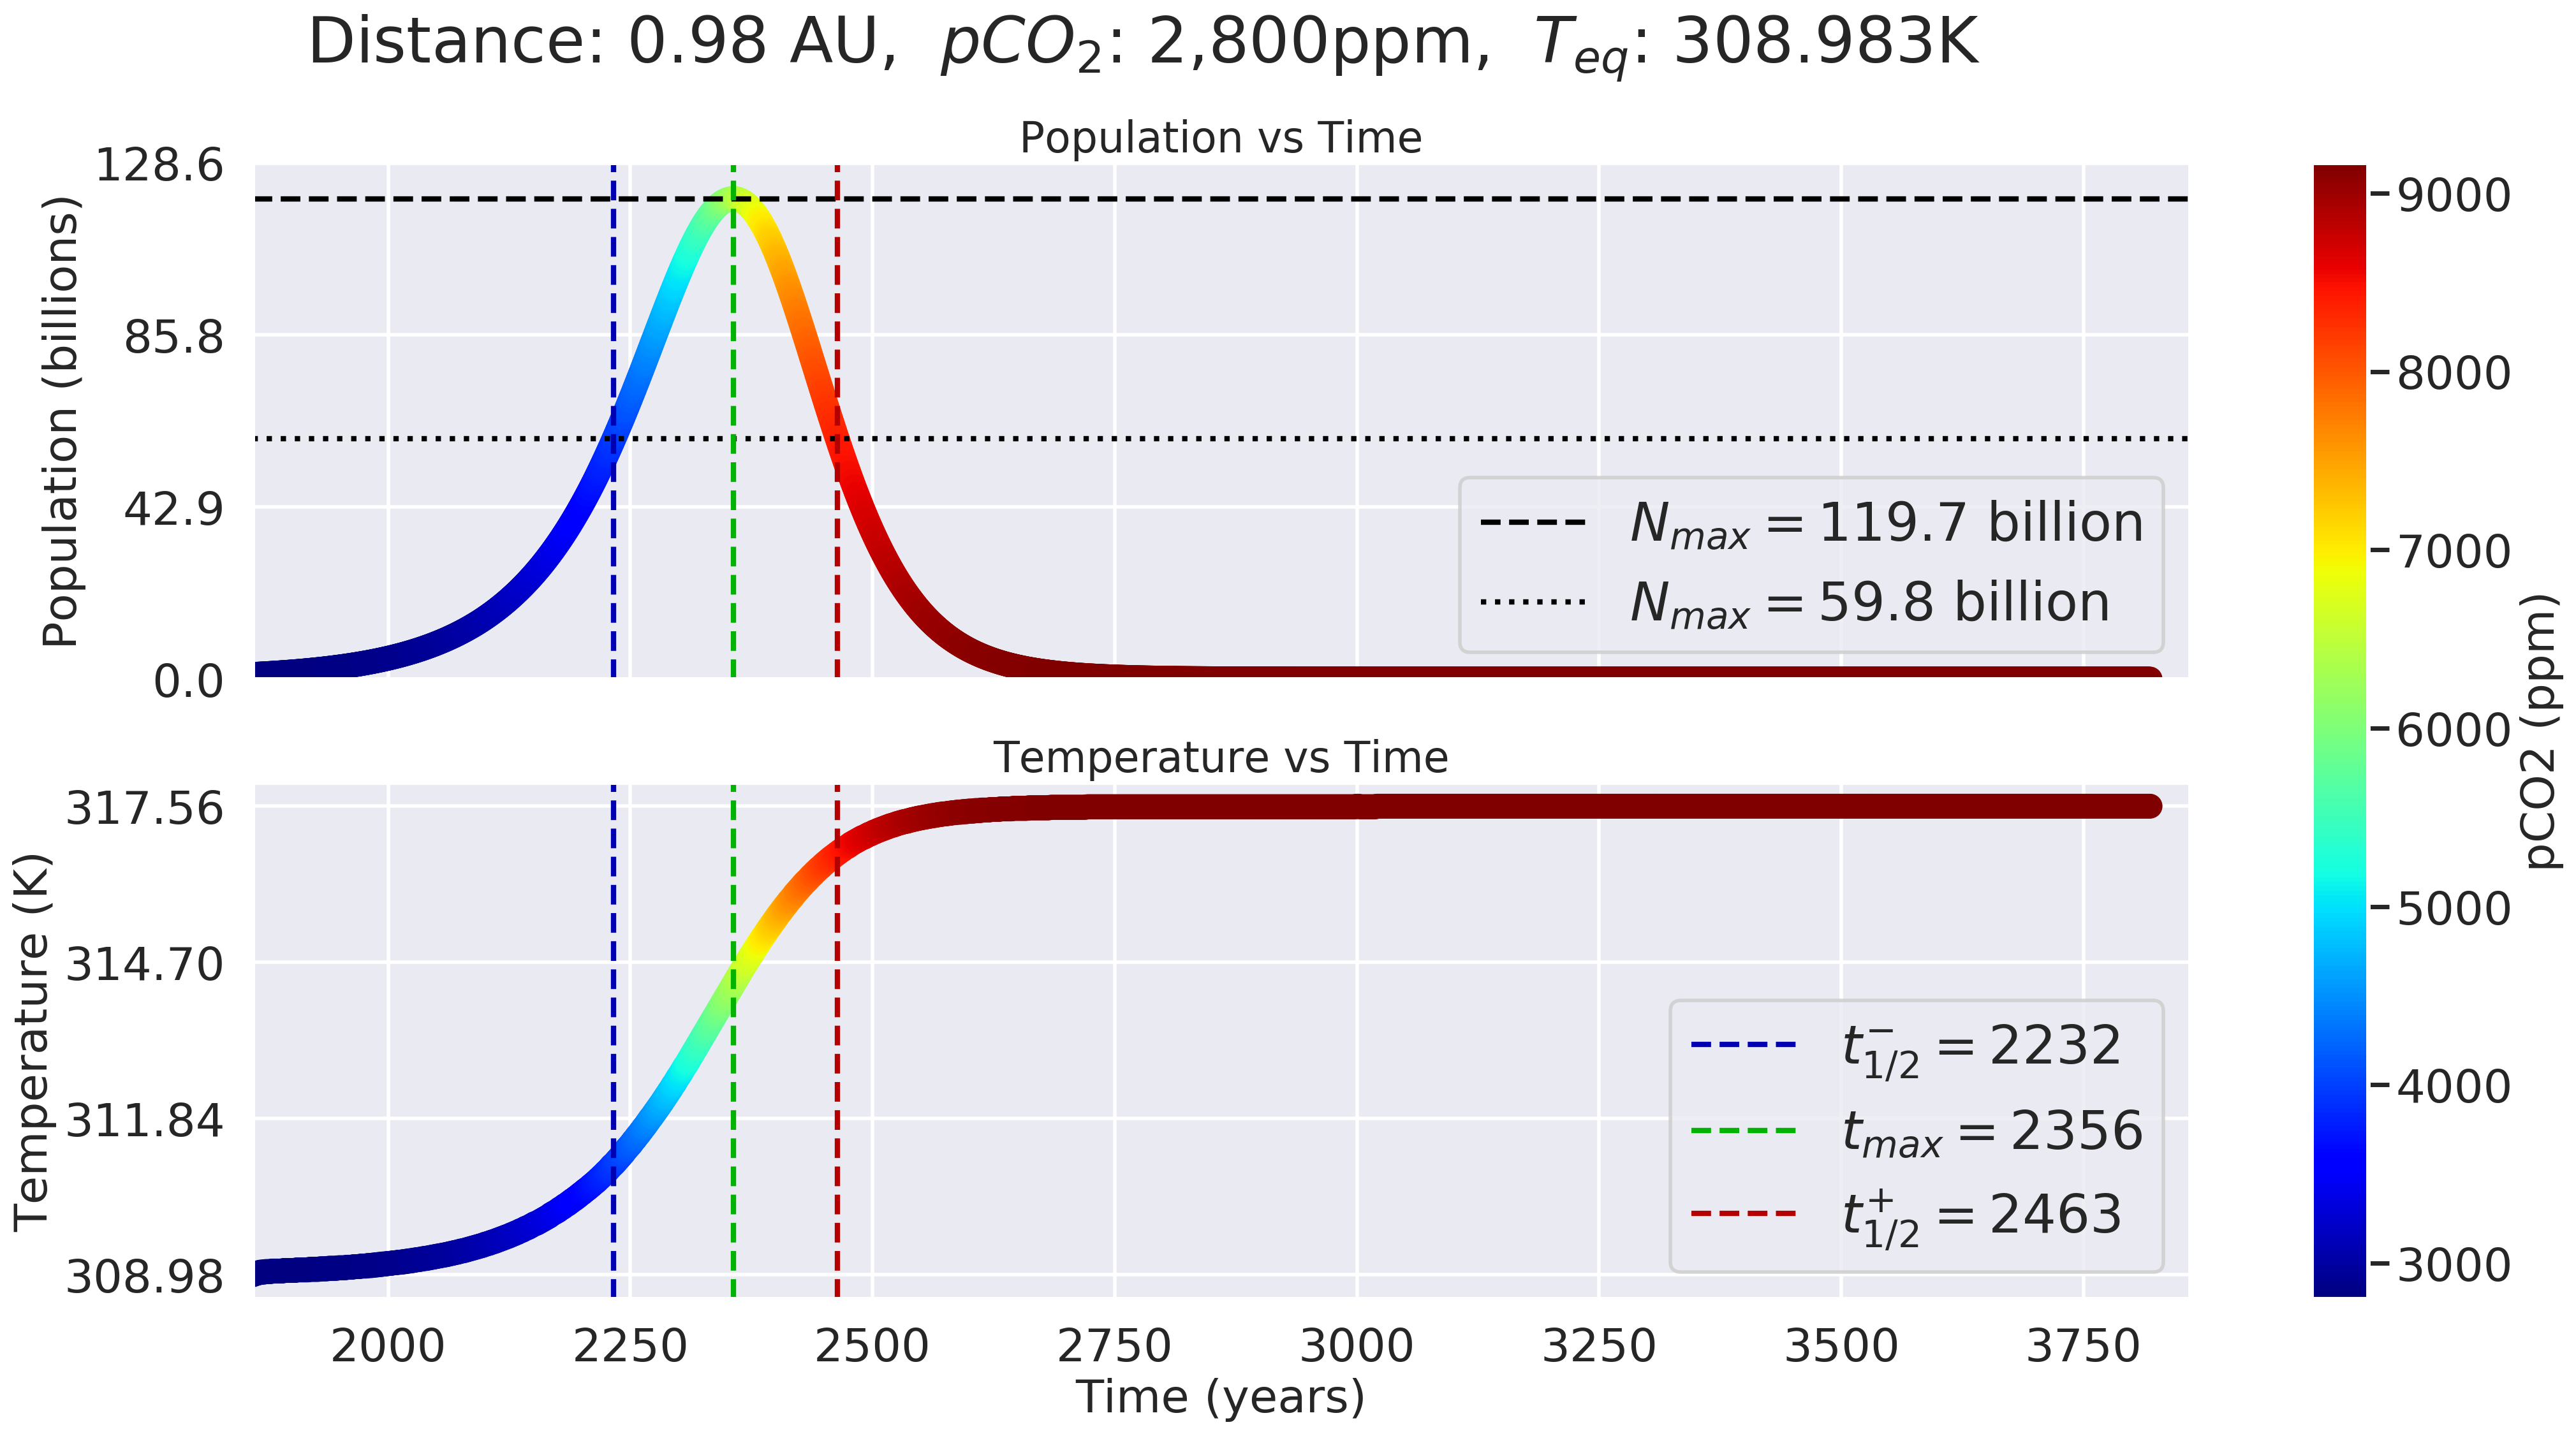

Equilibrium Reached at Temp=295.92. At time=31.0
Final Temp(K): 304.55
Final Temp(F): 88.52



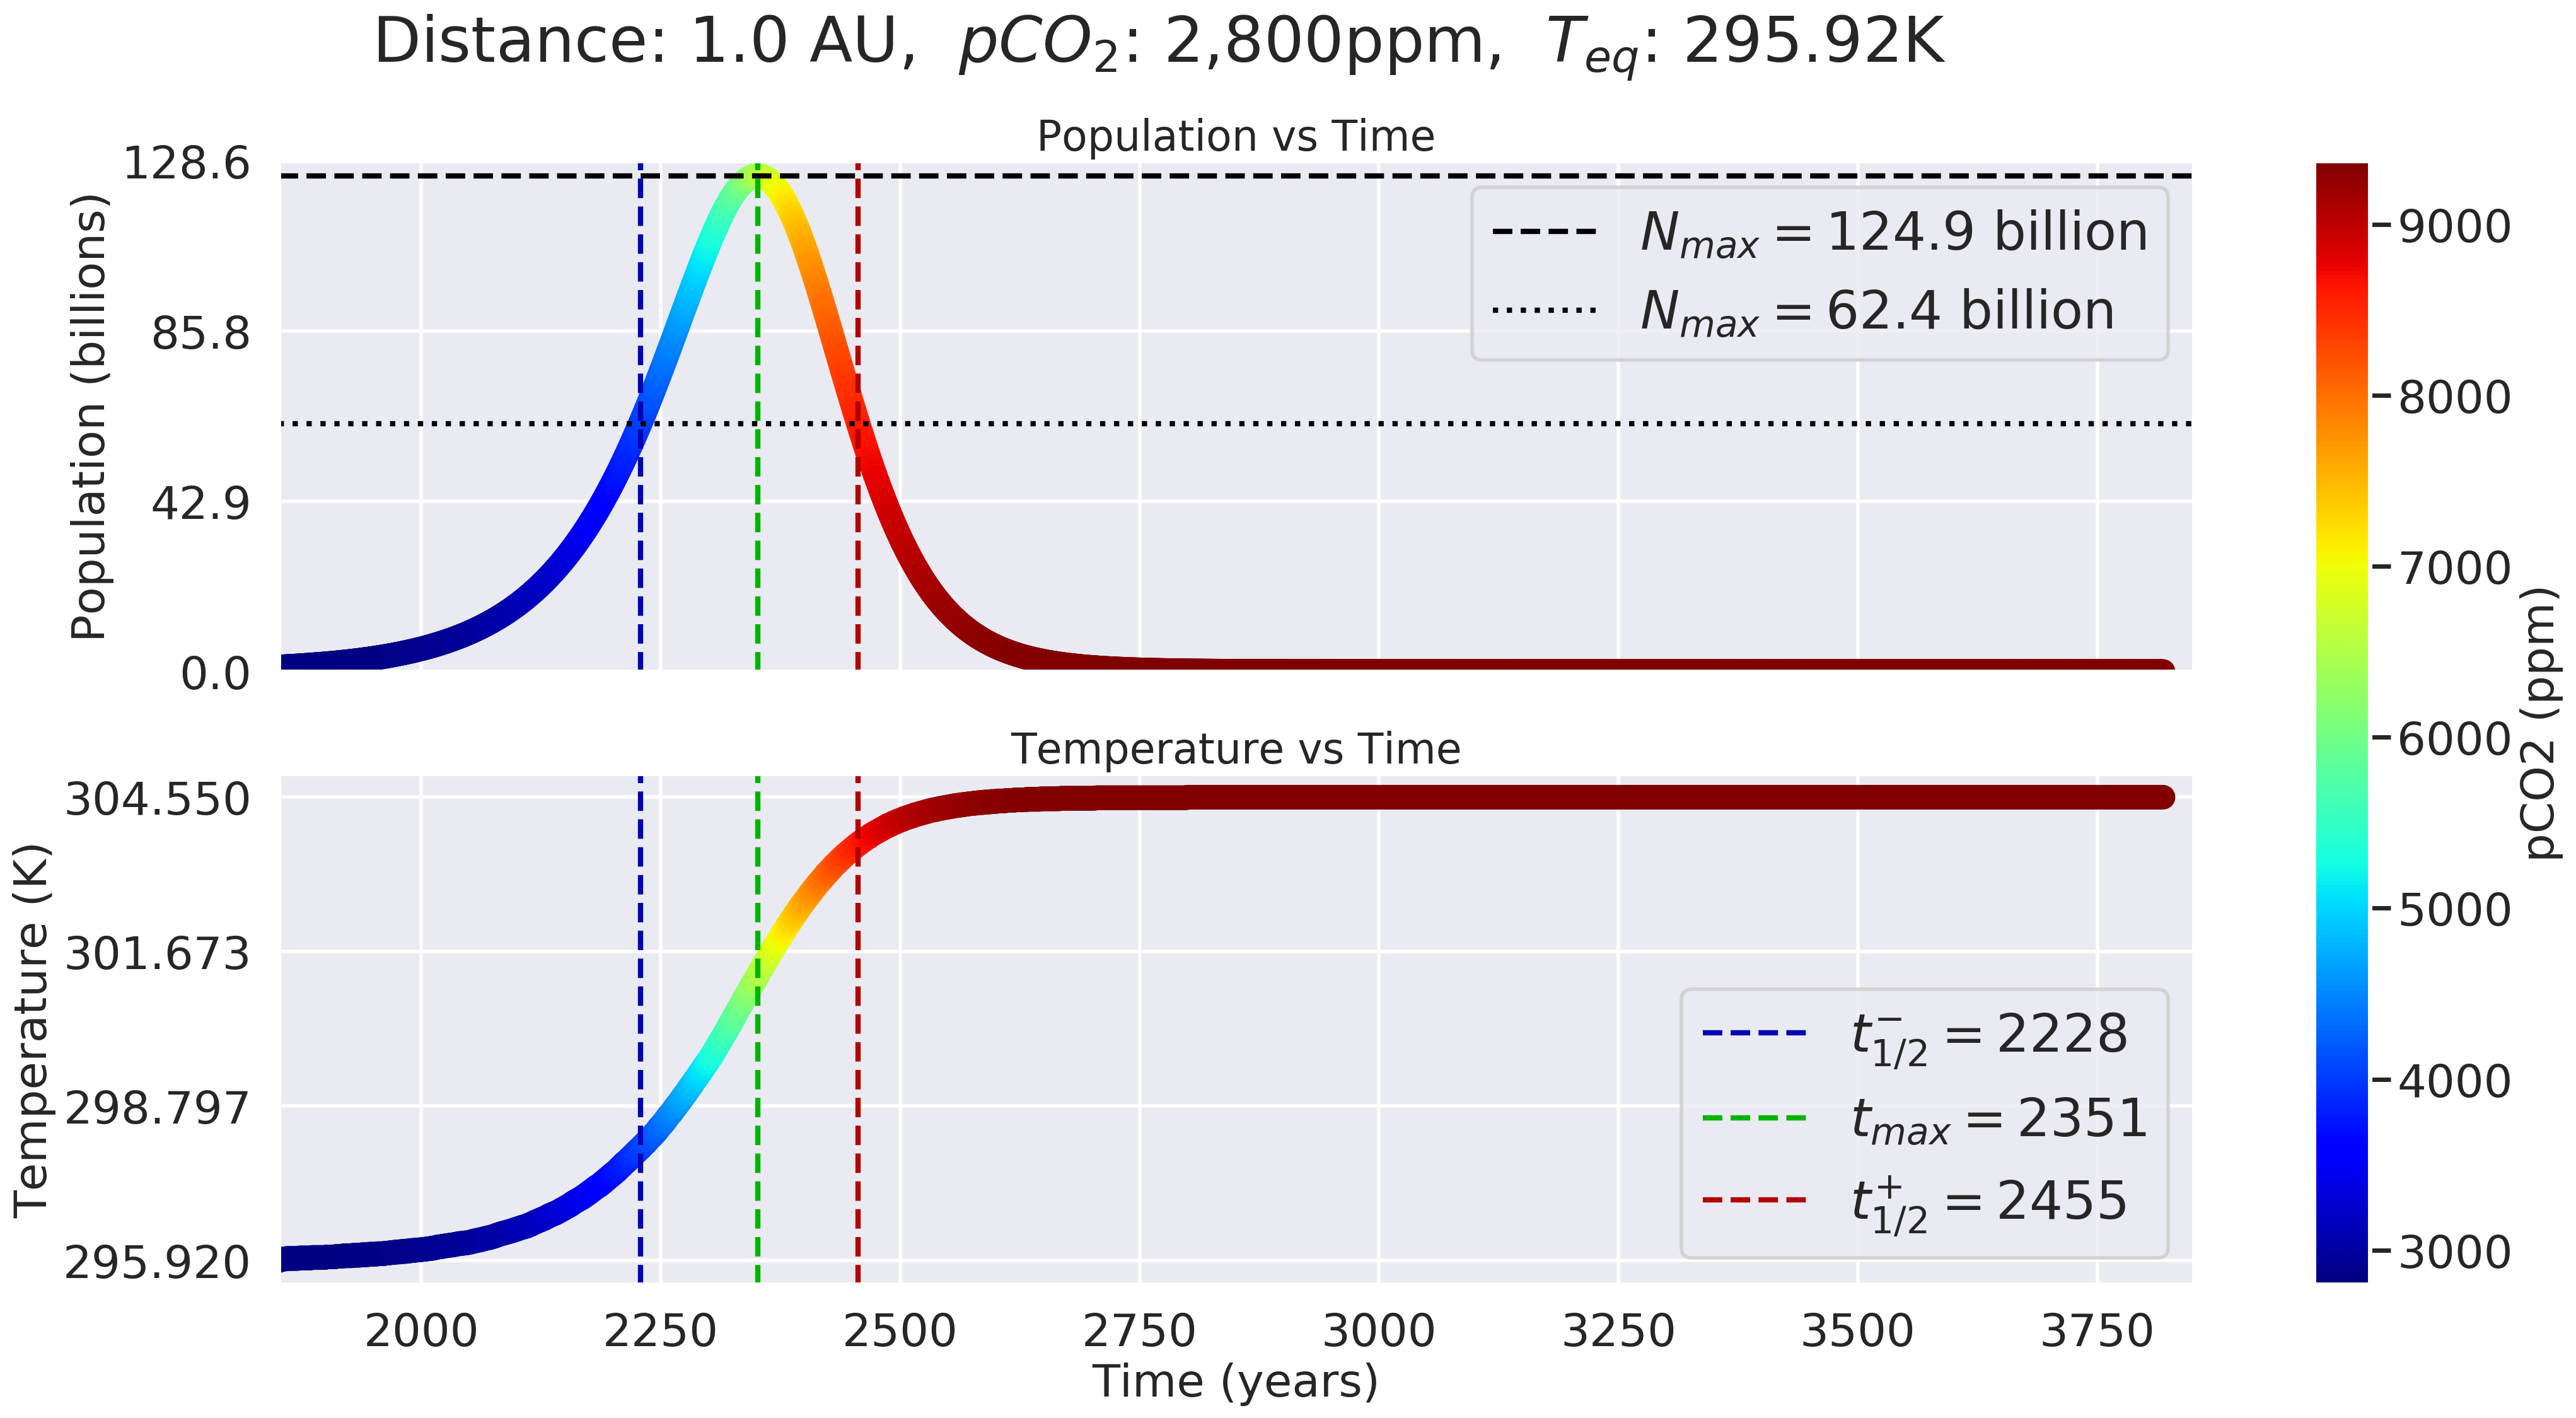

Equilibrium Reached at Temp=279.666. At time=25.0
Final Temp(K): 288.3
Final Temp(F): 59.27



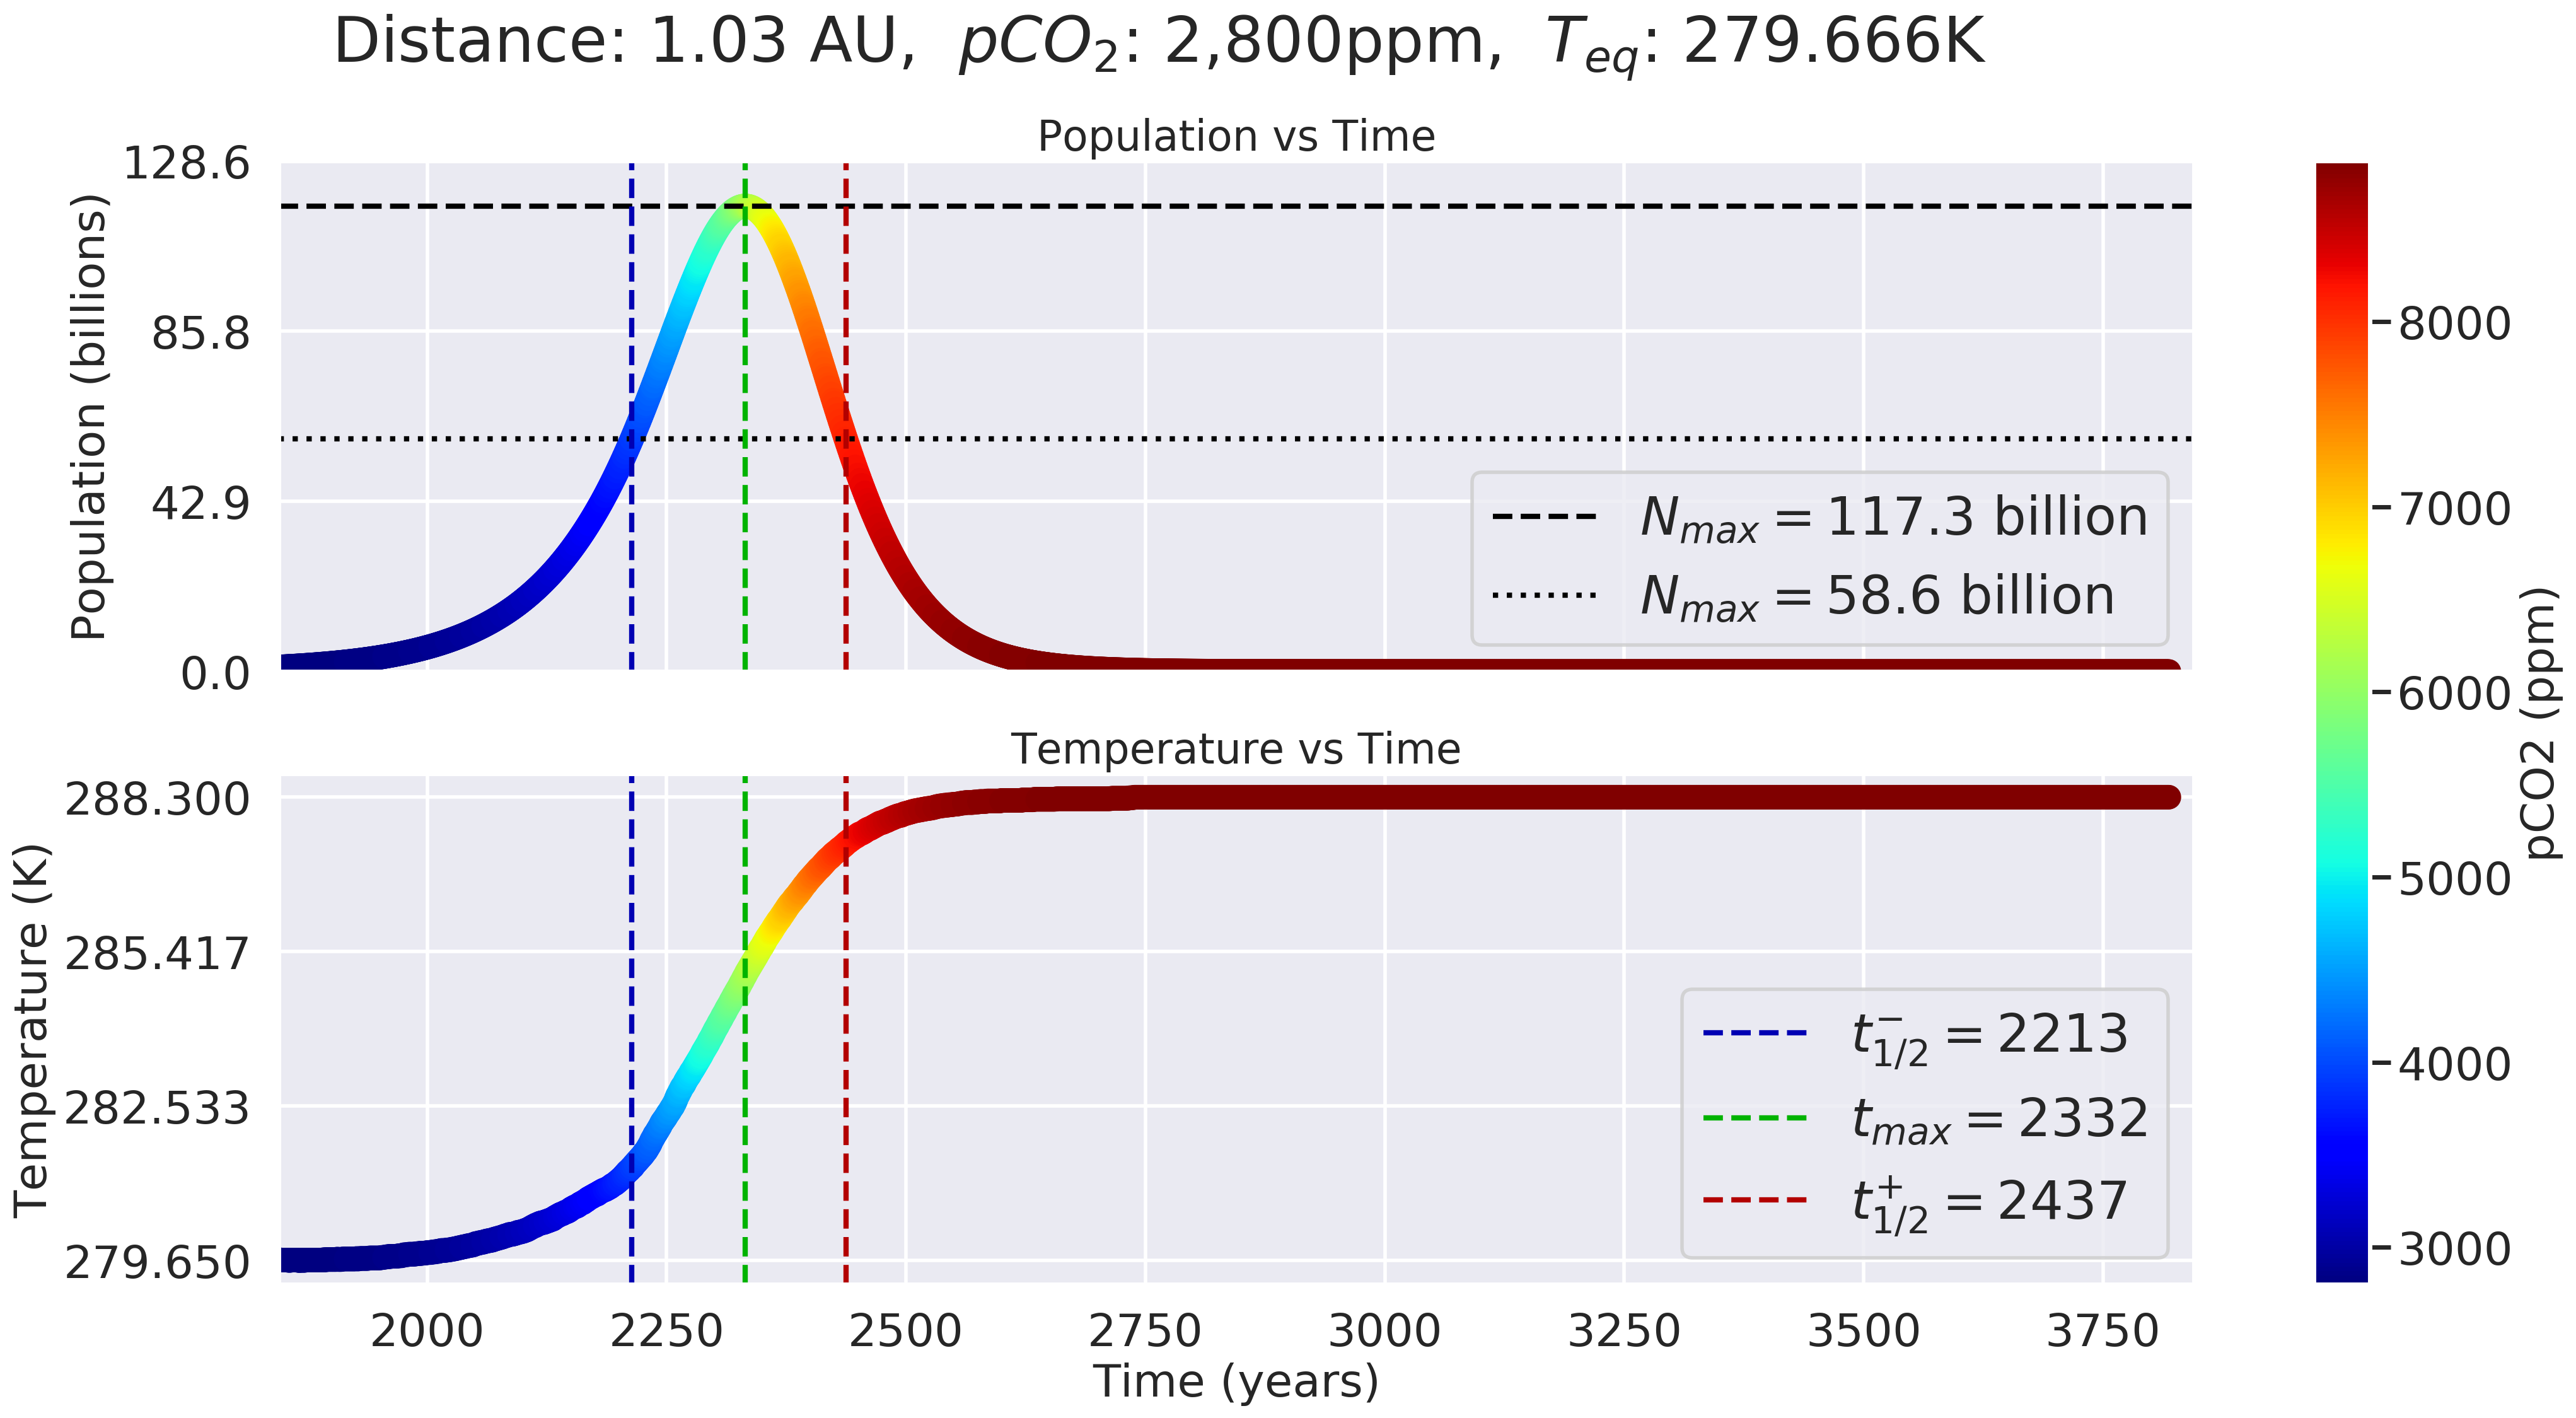

Elapsed Time: 900.6263494491577
The Habitable Zone if pCO2=28000ppm is:
Minimum: 0.94 AU
Maximum: 1.09 AU
Max Pop: 21738.0 billion, at Distance: 0.94

Equilibrium Reached at Temp=365.144. At time=68.0
Final Temp(K): 374.82
Final Temp(F): 215.01



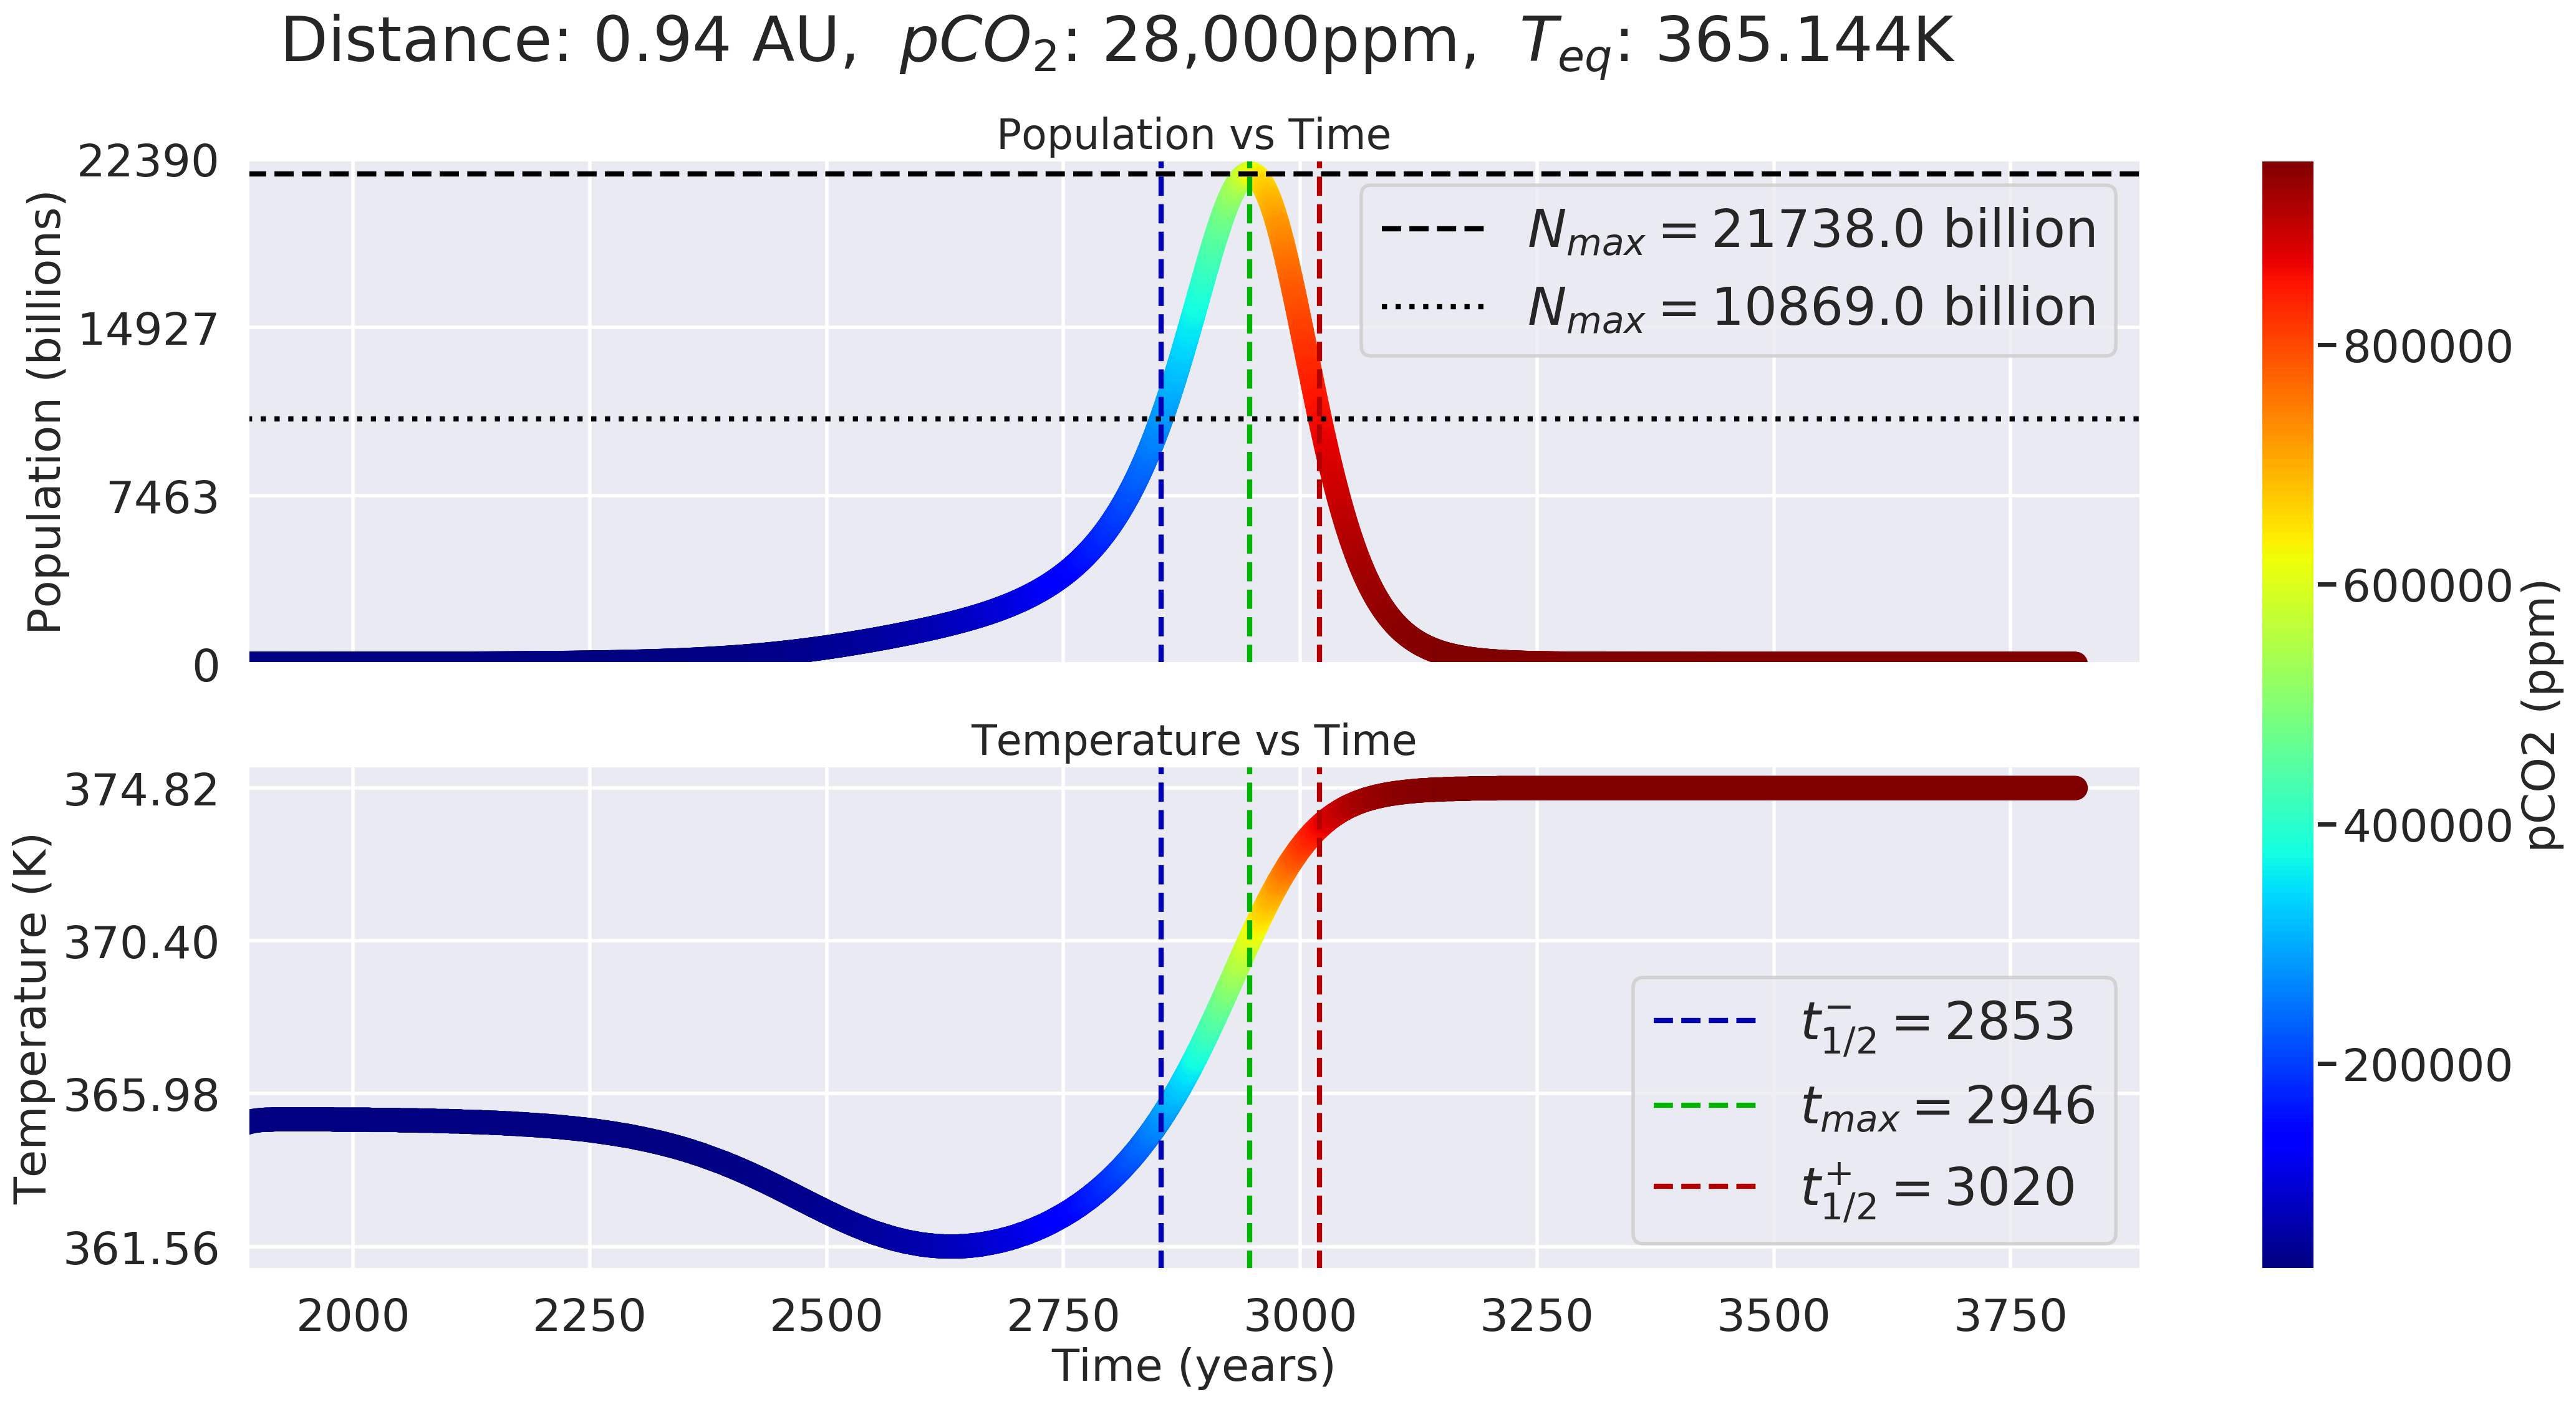

Equilibrium Reached at Temp=320.897. At time=38.0
Final Temp(K): 329.48
Final Temp(F): 133.39



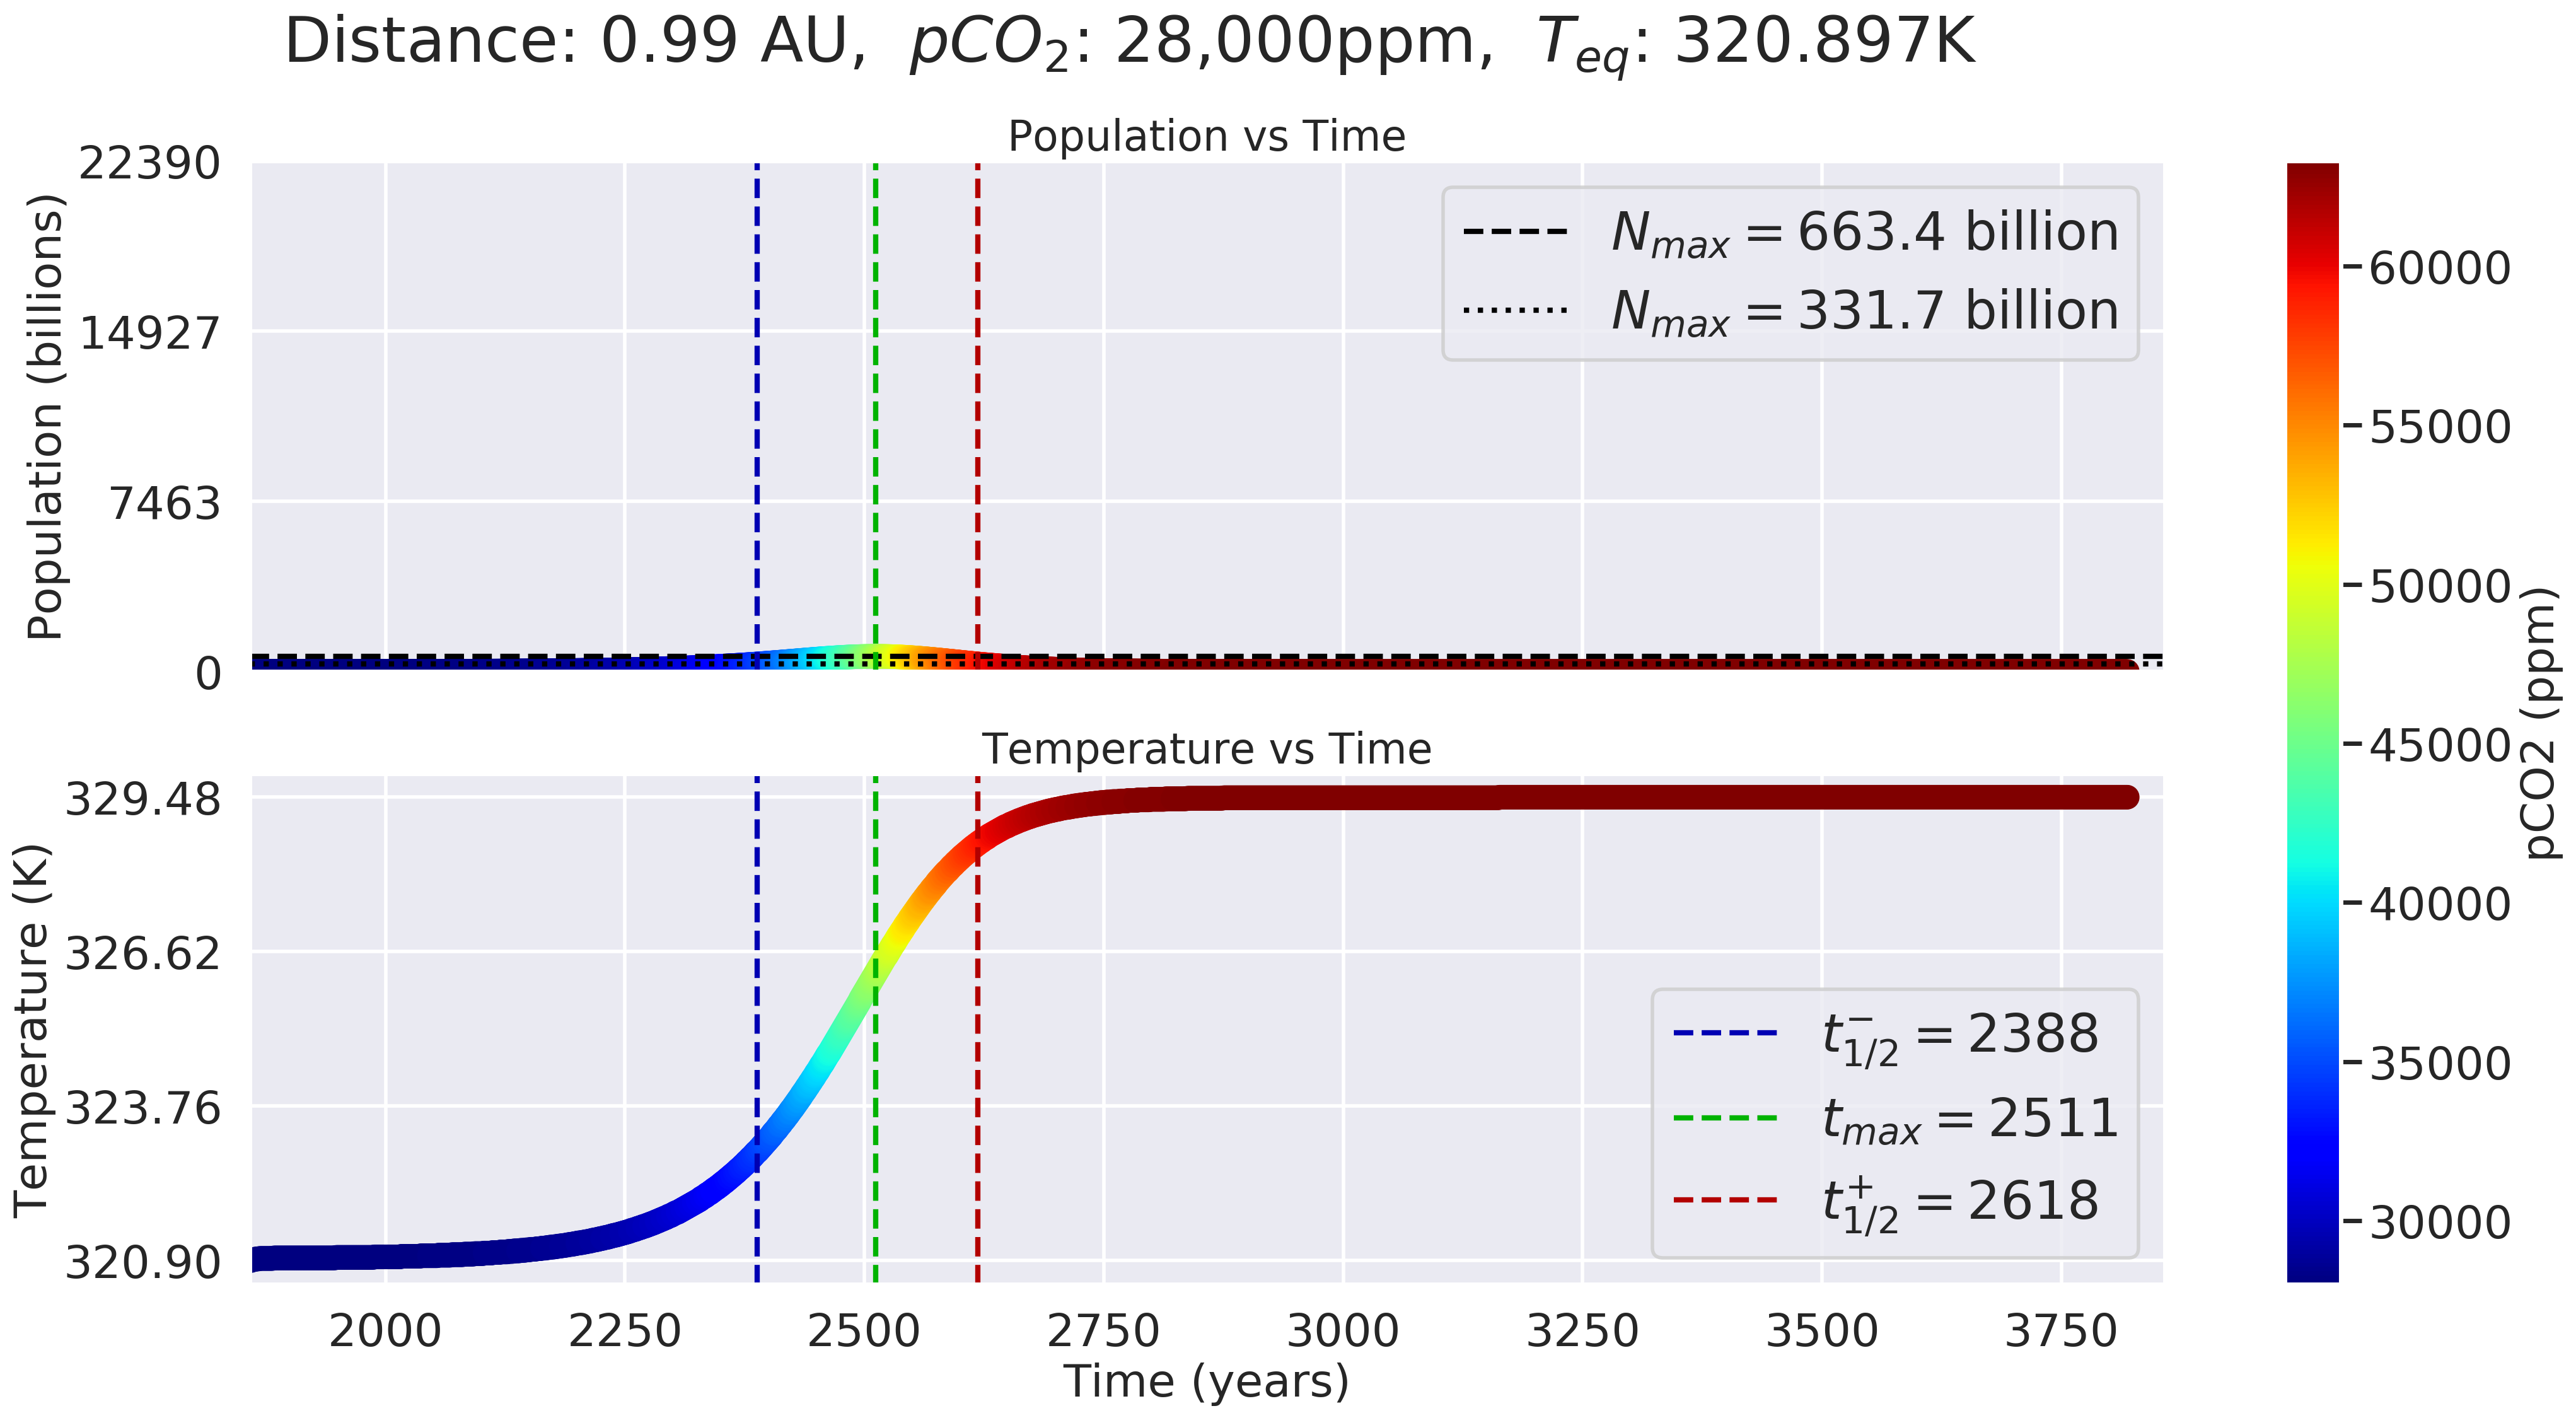

Equilibrium Reached at Temp=295.298. At time=27.0
Final Temp(K): 304.06
Final Temp(F): 87.64



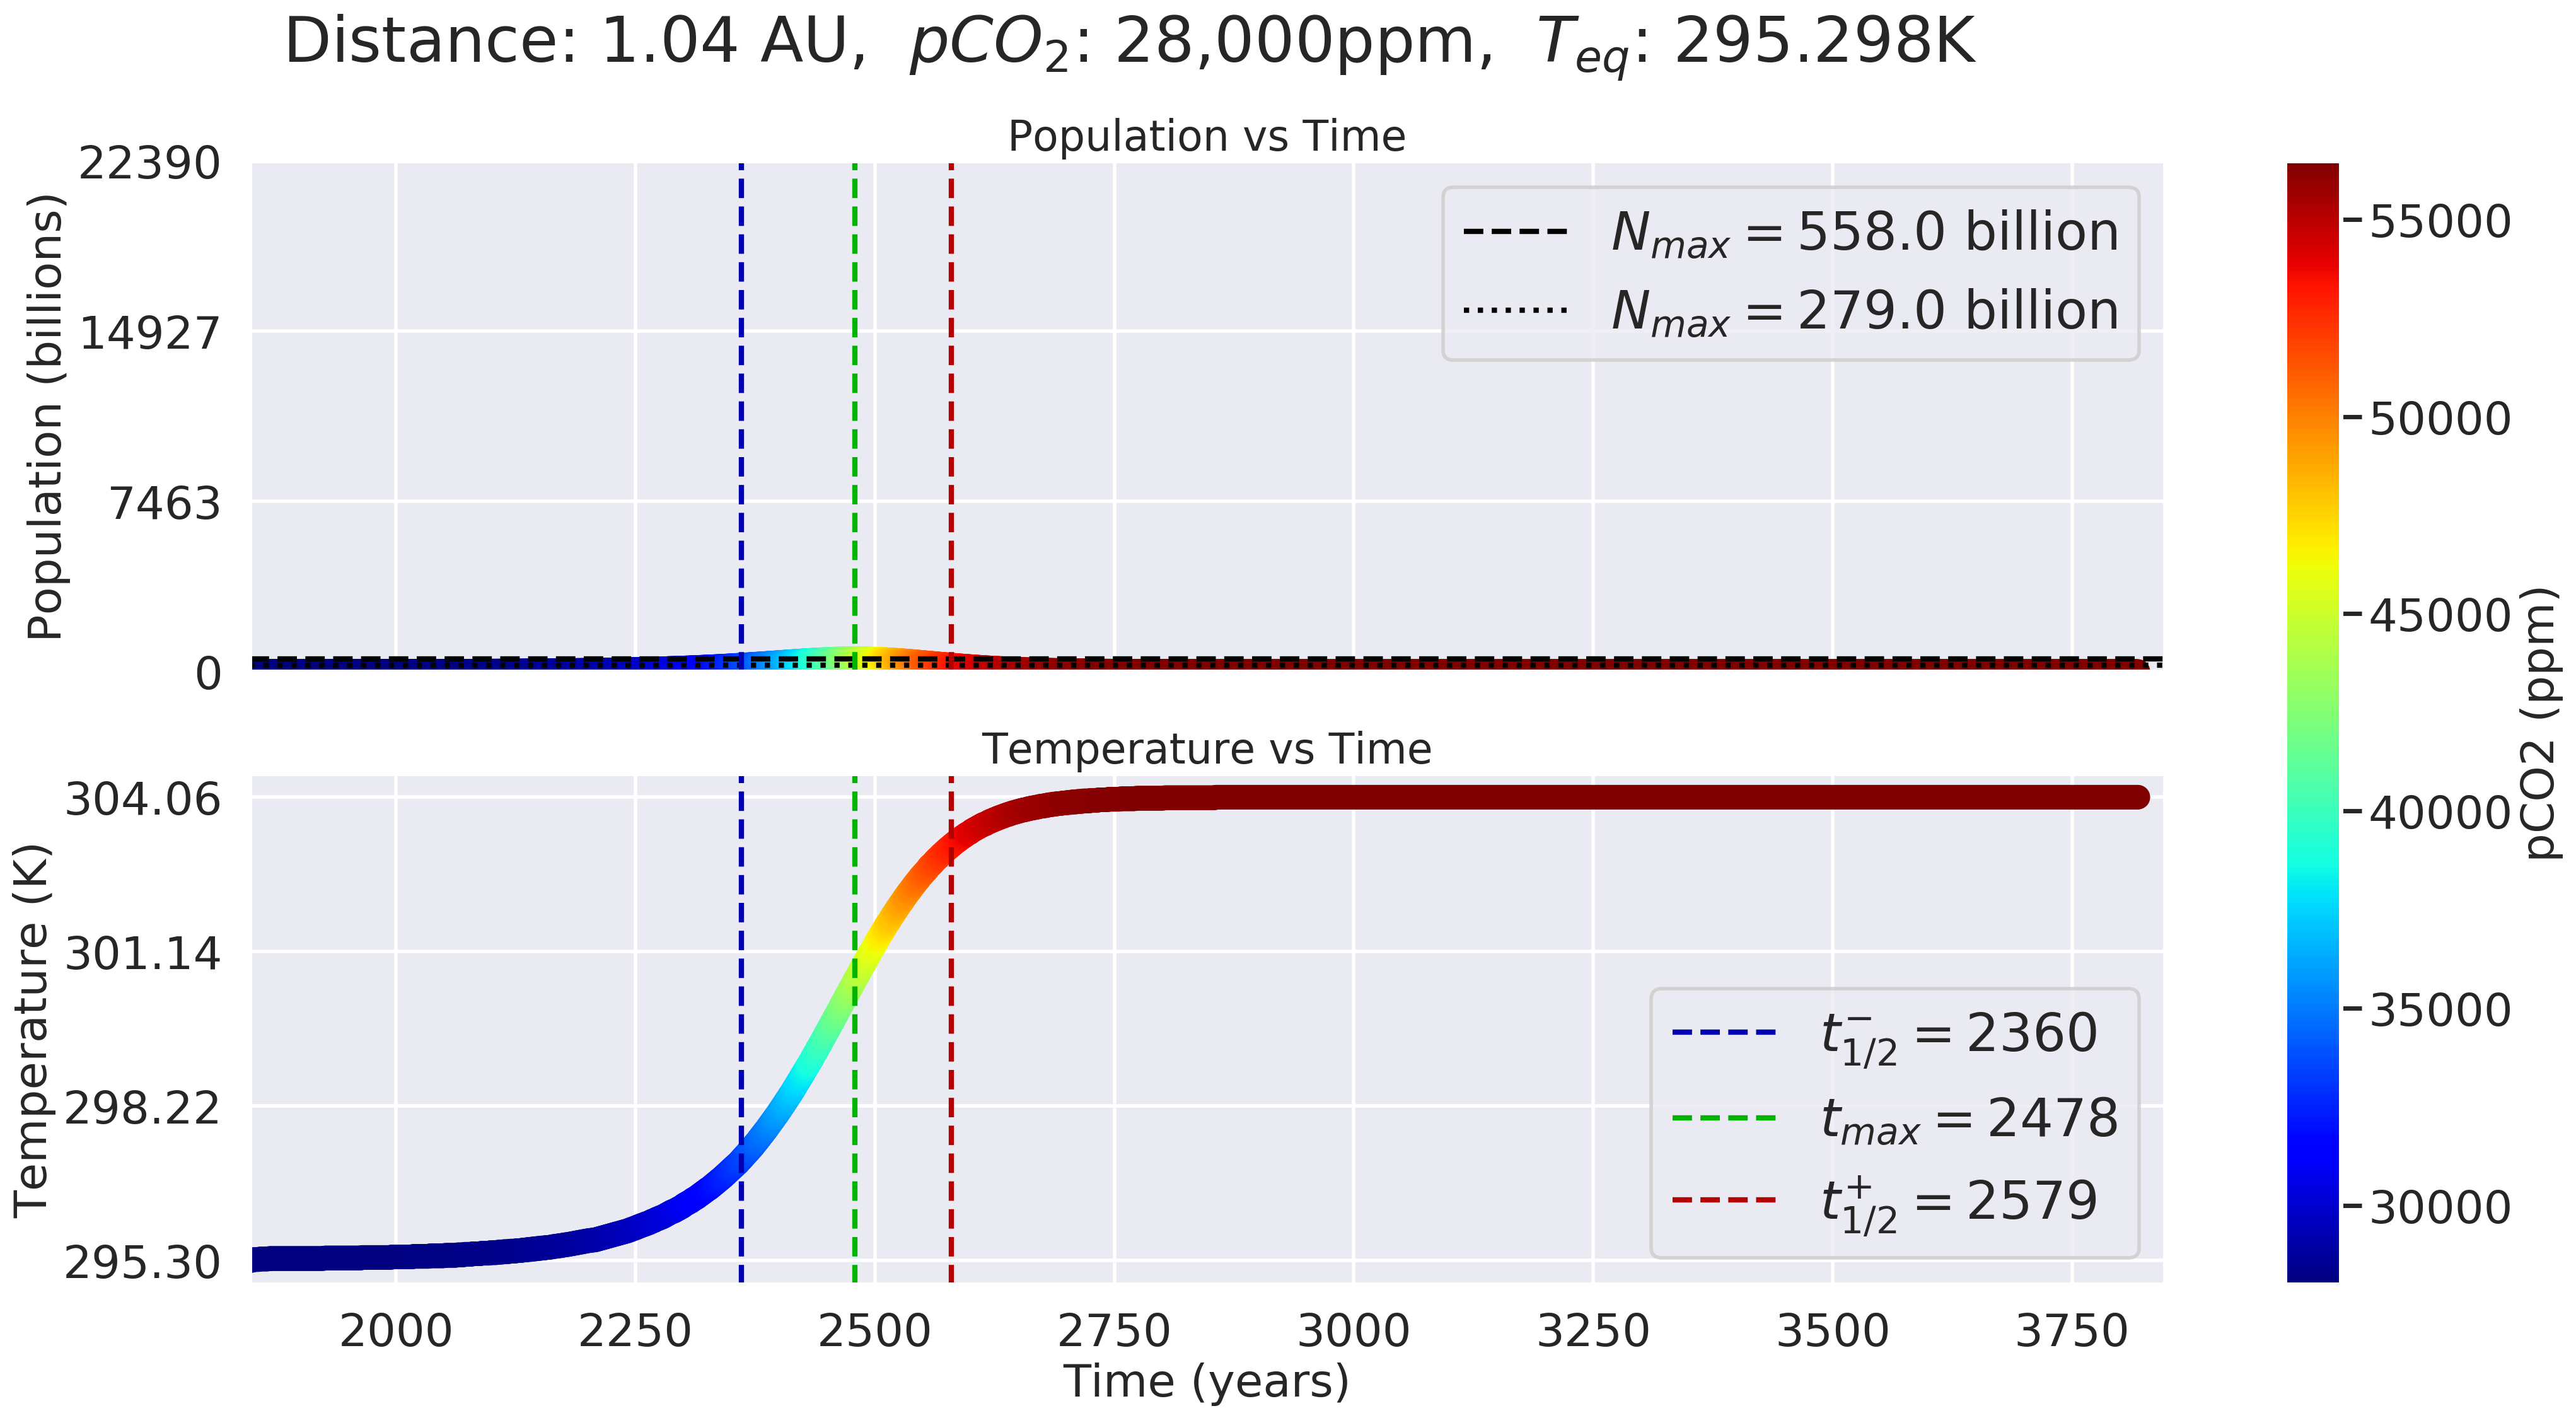

Equilibrium Reached at Temp=273.373. At time=33.0
Final Temp(K): 281.95
Final Temp(F): 47.84



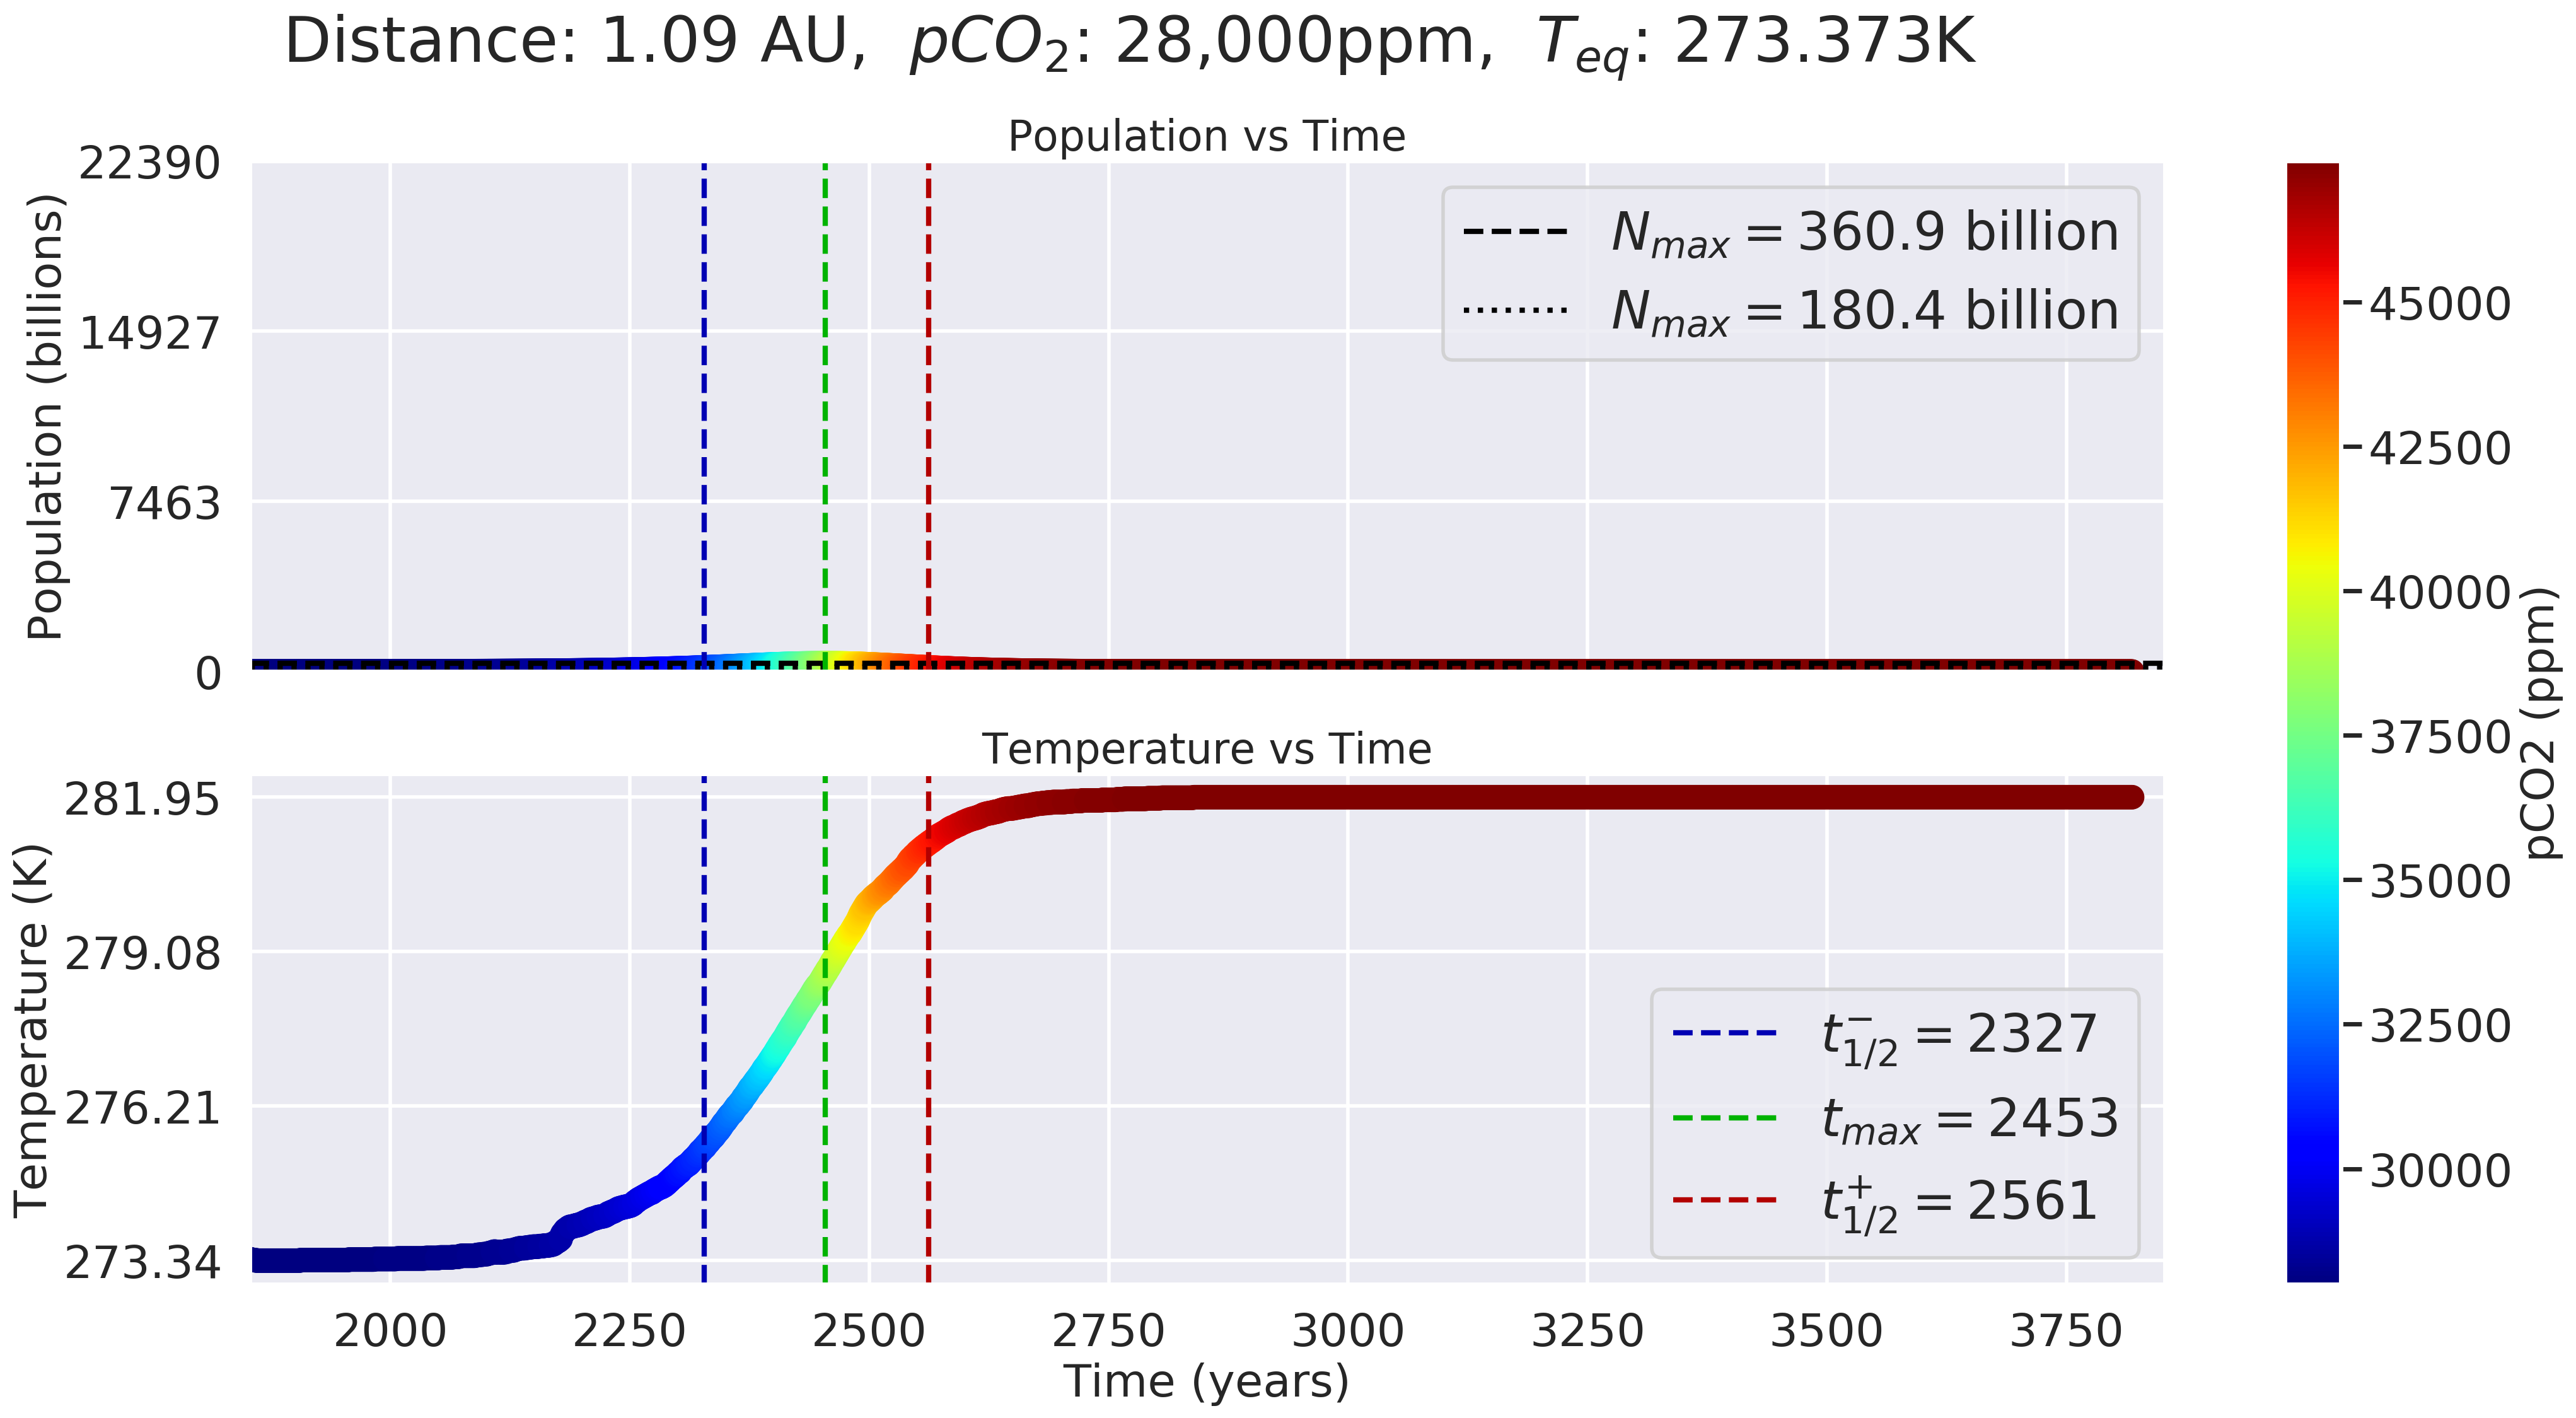

Elapsed Time: 1340.4451303482056


In [2]:
nameList = makeDefNamelist() #make namelist
nameList['ebm']['lverbose']=False #controls terminal output, used for debugging
nameList['ebm']['rBirth']=.0252;
nameList['ebm']['rDeath']=.0142857;
nameList['ebm']['rco2']=2.00e-4;
life=False;

start = time.time()

#specify inputs
multP=1
runTime=2000#change runtime(years)
coupled=True
saveName=1;#name of file
save=True;
fullMaxPop=0
save=True;#save the file
for j in [28,280,2800,28000]:#pco2 loops
    newPco2=int(j)#change pco2 (ppm)
    newA = .9#change distance (AU)
    dA=.01
    minA, maxA, fullMaxPop, fullMaxPopA = habitableZone(nameList,newPco2,newA,runTime,dA)
    print("The Habitable Zone if pCO2="+str(round(newPco2)) + "ppm is:")
    print("Minimum: "+str(minA) + " AU")
    print("Maximum: "+str(maxA)+" AU")
    print("Max Pop: " + str(fullMaxPop)+ " billion" + ", at Distance: " + str(round(fullMaxPopA,3))+"\n") 

    for i in np.linspace(minA,maxA,4):#population loops
    #calculate inputs
        newA = round(i,3) #change distance (AU)
        nameList['ebm']['coupled']=coupled
        nameList['ebm']['pco20']=newPco2/10**6#convert pco2 to bars
        nameList['ebm']['relsolcon']=newA**-2 #inverse square law for solar flux
        nameList['ebm']['runTime'] = runTime#change runtime
    #run program
        dfModel, finalavgtemp, eqTime, eqTemp, equilibrium = runProgram("driver.exe",nameList,True)#False=no output
    #plot the results
        if coupled:
            popStats = analyzeRun(dfModel,nameList,False)#True Prints Dictionary Values
            popStats['maxPopPlot']=fullMaxPop+(3/100)*fullMaxPop#maximum population range
            inputs=[newA,newPco2,runTime]
            if equilibrium: plotModelOutput(dfModel,inputs,eqTime,eqTemp,popStats,save,saveName)#plot the output of our model, colored by pco2 
            saveName+=1
    end = time.time()
    print( "Elapsed Time: " + str(end-start))
    call("echo End of Python Notebook Reached", shell=True);

In [43]:
for i in np.logspace(1,4,num=4,base=10)*2.84:
    print(i)

28.4
284.0
2840.0
28400.0


## Model Analysis

In [4]:
#dfTemp = pd.read_csv('anomaly.csv');#data from NASA GISS: https://data.giss.nasa.gov/gistemp/graphs_v4/
#dfPopCo2 = pd.read_csv('world_stats.csv');#data from Frank, Adam, and Woodruff Sullivan.
#plotModelInput(nameList)#plot the temperature dependence on the growth rate
#plotTruePopCo2(dfPopCo2) #plot true population values vs pco2
#compareModelOutput(dfModel,dfTemp,dfPopCo2)#compare the models output to true data